<a href="https://colab.research.google.com/github/ACK638690/Prasunet_ML_4/blob/main/Handgestures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import random

%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger, ReduceLROnPlateau

import tensorflow as tf
import random as rn
import cv2
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download -d gti-upm/leapgestrecog
! unzip leapgestrecog.zip

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRe

In [ ]:
lookup = dict()
reverselookup = dict()
count = 0

for j in os.listdir('/content/leapgestrecog/leapGestRecog/00/'):
    if not j.startswith('.'):
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1

x_data = []
y_data = []
IMG_SIZE = 150
datacount = 0


In [ ]:
for i in range(0, 10):
    for j in os.listdir('/content/leapgestrecog/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'):
            count = 0
            for k in os.listdir('/content/leapgestrecog/leapGestRecog/0' + str(i) + '/' + j + '/'):
                path = '/content/leapgestrecog/leapGestRecog/0' + str(i) + '/' + j + '/' + k
                img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                arr = np.array(img)
                x_data.append(arr)
                count = count + 1

            y_values = np.full((count, 1), lookup[j])
            y_data.append(y_values)
            datacount = datacount + count

x_data = np.array(x_data, dtype='float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1)

In [ ]:
for i in range(10):  # Loop over the ten top-level folders
    folder_path = f'/content/leapgestrecog/leapGestRecog/0{i}/'
    total_files = sum([len(files) for _, _, files in os.walk(folder_path)])
    print(f"Total files in {folder_path}: {total_files}")

Total files in /content/leapgestrecog/leapGestRecog/00/: 2000
Total files in /content/leapgestrecog/leapGestRecog/01/: 2000
Total files in /content/leapgestrecog/leapGestRecog/02/: 2000
Total files in /content/leapgestrecog/leapGestRecog/03/: 2000
Total files in /content/leapgestrecog/leapGestRecog/04/: 2000
Total files in /content/leapgestrecog/leapGestRecog/05/: 2000
Total files in /content/leapgestrecog/leapGestRecog/06/: 2000
Total files in /content/leapgestrecog/leapGestRecog/07/: 2000
Total files in /content/leapgestrecog/leapGestRecog/08/: 2000
Total files in /content/leapgestrecog/leapGestRecog/09/: 2000


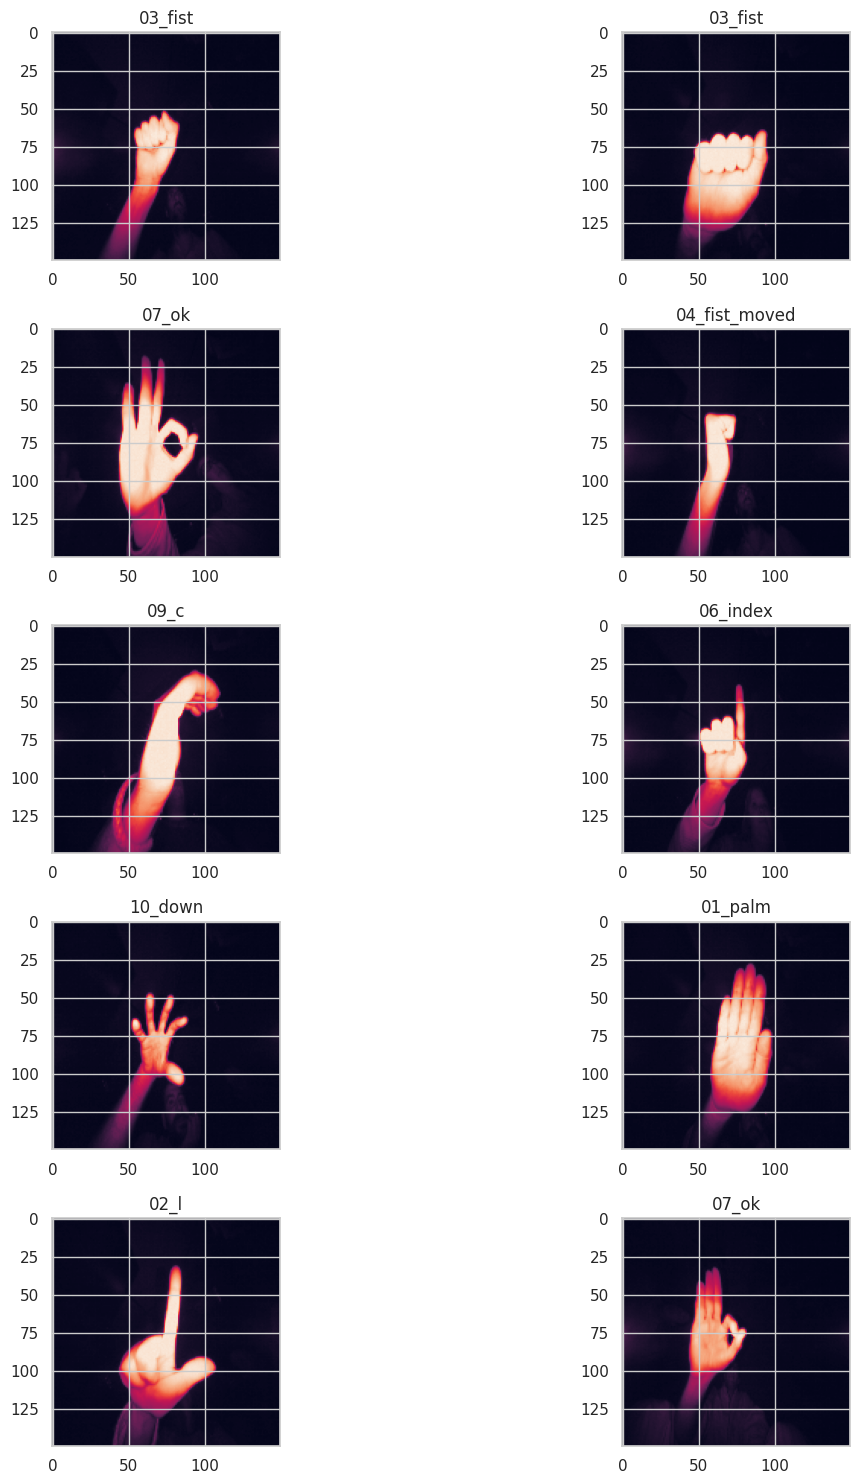

In [ ]:
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)

for i in range(5):
    for j in range(2):
        l = rn.randint(0, len(y_data))
        ax[i, j].imshow(x_data[l])
        ax[i, j].set_title(reverselookup[y_data[l, 0]])

plt.tight_layout()

In [ ]:
y_data=to_categorical(y_data)
x_data = x_data.reshape((datacount, IMG_SIZE, IMG_SIZE, 1))
x_data = x_data/255

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.25,random_state=42)

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,1)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10, activation = "softmax"))

In [ ]:
batch_size=128
epochs=10

In [ ]:
checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    save_freq=1
)

earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)

tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    write_graph=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False,
)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1,
    mode='auto'
)

callbacks = [checkpoint,tensorboard,csvlogger,reduce]

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      832       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 18, 18, 96)       

In [ ]:
History = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test, y_test),callbacks=callbacks)

Epoch 1/10


  1/118 [..............................] - ETA: 18:06 - loss: 2.3053 - accuracy: 0.1250

  2/118 [..............................] - ETA: 11:34 - loss: 2.3015 - accuracy: 0.1133

  3/118 [..............................] - ETA: 12:47 - loss: 2.2820 - accuracy: 0.1823

  4/118 [>.............................] - ETA: 12:24 - loss: 2.2645 - accuracy: 0.1855

  5/118 [>.............................] - ETA: 12:33 - loss: 2.2502 - accuracy: 0.1766

  6/118 [>.............................] - ETA: 12:29 - loss: 2.2038 - accuracy: 0.2253

  7/118 [>.............................] - ETA: 12:23 - loss: 2.1636 - accuracy: 0.2422

  8/118 [=>............................] - ETA: 12:18 - loss: 2.0980 - accuracy: 0.2744

  9/118 [=>............................] - ETA: 12:10 - loss: 2.0182 - accuracy: 0.3073

 10/118 [=>............................] - ETA: 12:09 - loss: 1.9618 - accuracy: 0.3289

 11/118 [=>............................] - ETA: 11:57 - loss: 1.9103 - accuracy: 0.3466

 12/118 [==>...........................] - ETA: 11:57 - loss: 1.8496 - accuracy: 0.3613

 13/118 [==>...........................] - ETA: 11:43 - loss: 1.7867 - accuracy: 0.3840

 14/118 [==>...........................] - ETA: 11:45 - loss: 1.7330 - accuracy: 0.4062

 15/118 [==>...........................] - ETA: 11:32 - loss: 1.6924 - accuracy: 0.4271

 16/118 [===>..........................] - ETA: 11:32 - loss: 1.6643 - accuracy: 0.4409

 17/118 [===>..........................] - ETA: 11:19 - loss: 1.6252 - accuracy: 0.4568

 18/118 [===>..........................] - ETA: 11:18 - loss: 1.5854 - accuracy: 0.4727

 19/118 [===>..........................] - ETA: 11:07 - loss: 1.5386 - accuracy: 0.4901

 20/118 [====>.........................] - ETA: 11:06 - loss: 1.5032 - accuracy: 0.5020

 21/118 [====>.........................] - ETA: 10:55 - loss: 1.4670 - accuracy: 0.5134

 22/118 [====>.........................] - ETA: 10:52 - loss: 1.4242 - accuracy: 0.5295

 23/118 [====>.........................] - ETA: 10:42 - loss: 1.3924 - accuracy: 0.5411

 24/118 [=====>........................] - ETA: 10:37 - loss: 1.3637 - accuracy: 0.5524

 25/118 [=====>........................] - ETA: 10:27 - loss: 1.3323 - accuracy: 0.5625

 26/118 [=====>........................] - ETA: 10:22 - loss: 1.2953 - accuracy: 0.5757

 27/118 [=====>........................] - ETA: 10:13 - loss: 1.2612 - accuracy: 0.5871

 28/118 [======>.......................] - ETA: 10:07 - loss: 1.2310 - accuracy: 0.5977

 29/118 [======>.......................] - ETA: 10:00 - loss: 1.1993 - accuracy: 0.6086

 30/118 [======>.......................] - ETA: 9:52 - loss: 1.1675 - accuracy: 0.6193 

 31/118 [======>.......................] - ETA: 9:46 - loss: 1.1407 - accuracy: 0.6278

 32/118 [=======>......................] - ETA: 9:38 - loss: 1.1093 - accuracy: 0.6382

 33/118 [=======>......................] - ETA: 9:33 - loss: 1.0882 - accuracy: 0.6461

 34/118 [=======>......................] - ETA: 9:25 - loss: 1.0603 - accuracy: 0.6551

 35/118 [=======>......................] - ETA: 9:20 - loss: 1.0350 - accuracy: 0.6636

 36/118 [========>.....................] - ETA: 9:11 - loss: 1.0092 - accuracy: 0.6723

 37/118 [========>.....................] - ETA: 9:07 - loss: 0.9865 - accuracy: 0.6799

 38/118 [========>.....................] - ETA: 8:58 - loss: 0.9651 - accuracy: 0.6865

 39/118 [========>.....................] - ETA: 8:54 - loss: 0.9420 - accuracy: 0.6941

 40/118 [=========>....................] - ETA: 8:45 - loss: 0.9208 - accuracy: 0.7010

 41/118 [=========>....................] - ETA: 8:40 - loss: 0.9034 - accuracy: 0.7062

 42/118 [=========>....................] - ETA: 8:32 - loss: 0.8838 - accuracy: 0.7128

 43/118 [=========>....................] - ETA: 8:27 - loss: 0.8658 - accuracy: 0.7186

 44/118 [==========>...................] - ETA: 8:19 - loss: 0.8486 - accuracy: 0.7248

 45/118 [==========>...................] - ETA: 8:20 - loss: 0.8357 - accuracy: 0.7299

 46/118 [==========>...................] - ETA: 8:12 - loss: 0.8197 - accuracy: 0.7351

 47/118 [==========>...................] - ETA: 8:07 - loss: 0.8038 - accuracy: 0.7404

 48/118 [===========>..................] - ETA: 7:58 - loss: 0.7905 - accuracy: 0.7446

 49/118 [===========>..................] - ETA: 7:53 - loss: 0.7760 - accuracy: 0.7494

 50/118 [===========>..................] - ETA: 7:45 - loss: 0.7610 - accuracy: 0.7544

 51/118 [===========>..................] - ETA: 7:38 - loss: 0.7480 - accuracy: 0.7584

 52/118 [============>.................] - ETA: 7:31 - loss: 0.7347 - accuracy: 0.7628

 53/118 [============>.................] - ETA: 7:24 - loss: 0.7231 - accuracy: 0.7667

 54/118 [============>.................] - ETA: 7:17 - loss: 0.7103 - accuracy: 0.7710

 55/118 [============>.................] - ETA: 7:09 - loss: 0.6979 - accuracy: 0.7751

 56/118 [=============>................] - ETA: 7:03 - loss: 0.6864 - accuracy: 0.7789

 57/118 [=============>................] - ETA: 6:55 - loss: 0.6752 - accuracy: 0.7826

 58/118 [=============>................] - ETA: 6:49 - loss: 0.6644 - accuracy: 0.7862

 59/118 [==============>...............] - ETA: 6:41 - loss: 0.6538 - accuracy: 0.7897

 60/118 [==============>...............] - ETA: 6:35 - loss: 0.6439 - accuracy: 0.7930

 61/118 [==============>...............] - ETA: 6:28 - loss: 0.6340 - accuracy: 0.7962

 62/118 [==============>...............] - ETA: 6:22 - loss: 0.6245 - accuracy: 0.7994

 63/118 [===============>..............] - ETA: 6:15 - loss: 0.6164 - accuracy: 0.8020

 64/118 [===============>..............] - ETA: 6:09 - loss: 0.6069 - accuracy: 0.8051

 65/118 [===============>..............] - ETA: 6:01 - loss: 0.5982 - accuracy: 0.8078

 66/118 [===============>..............] - ETA: 5:55 - loss: 0.5892 - accuracy: 0.8107

 67/118 [================>.............] - ETA: 5:48 - loss: 0.5806 - accuracy: 0.8135

 68/118 [================>.............] - ETA: 5:41 - loss: 0.5724 - accuracy: 0.8163

 69/118 [================>.............] - ETA: 5:34 - loss: 0.5642 - accuracy: 0.8188

 70/118 [================>.............] - ETA: 5:27 - loss: 0.5569 - accuracy: 0.8211

 71/118 [=================>............] - ETA: 5:20 - loss: 0.5493 - accuracy: 0.8235

 72/118 [=================>............] - ETA: 5:13 - loss: 0.5418 - accuracy: 0.8260

 73/118 [=================>............] - ETA: 5:07 - loss: 0.5345 - accuracy: 0.8283

 74/118 [=================>............] - ETA: 5:00 - loss: 0.5273 - accuracy: 0.8307

 75/118 [==================>...........] - ETA: 4:53 - loss: 0.5203 - accuracy: 0.8329

 76/118 [==================>...........] - ETA: 4:46 - loss: 0.5138 - accuracy: 0.8350

 77/118 [==================>...........] - ETA: 4:39 - loss: 0.5074 - accuracy: 0.8371

 78/118 [==================>...........] - ETA: 4:32 - loss: 0.5010 - accuracy: 0.8391

 79/118 [===================>..........] - ETA: 4:26 - loss: 0.4947 - accuracy: 0.8412

 80/118 [===================>..........] - ETA: 4:18 - loss: 0.4886 - accuracy: 0.8432

 81/118 [===================>..........] - ETA: 4:12 - loss: 0.4828 - accuracy: 0.8451

 82/118 [===================>..........] - ETA: 4:05 - loss: 0.4769 - accuracy: 0.8470

 83/118 [====================>.........] - ETA: 3:58 - loss: 0.4712 - accuracy: 0.8488

 84/118 [====================>.........] - ETA: 3:51 - loss: 0.4664 - accuracy: 0.8505

 85/118 [====================>.........] - ETA: 3:45 - loss: 0.4614 - accuracy: 0.8522

 86/118 [====================>.........] - ETA: 3:38 - loss: 0.4560 - accuracy: 0.8539

 87/118 [=====================>........] - ETA: 3:31 - loss: 0.4509 - accuracy: 0.8556

 88/118 [=====================>........] - ETA: 3:24 - loss: 0.4458 - accuracy: 0.8572

 89/118 [=====================>........] - ETA: 3:18 - loss: 0.4411 - accuracy: 0.8588

 90/118 [=====================>........] - ETA: 3:10 - loss: 0.4362 - accuracy: 0.8604

 91/118 [======================>.......] - ETA: 3:04 - loss: 0.4315 - accuracy: 0.8619

 92/118 [======================>.......] - ETA: 2:57 - loss: 0.4269 - accuracy: 0.8634

 93/118 [======================>.......] - ETA: 2:50 - loss: 0.4224 - accuracy: 0.8648

 94/118 [======================>.......] - ETA: 2:43 - loss: 0.4181 - accuracy: 0.8662

 95/118 [=======================>......] - ETA: 2:37 - loss: 0.4140 - accuracy: 0.8674

 96/118 [=======================>......] - ETA: 2:30 - loss: 0.4098 - accuracy: 0.8687

 97/118 [=======================>......] - ETA: 2:23 - loss: 0.4058 - accuracy: 0.8700

 98/118 [=======================>......] - ETA: 2:16 - loss: 0.4020 - accuracy: 0.8713

 99/118 [========================>.....] - ETA: 2:09 - loss: 0.3980 - accuracy: 0.8726

100/118 [========================>.....] - ETA: 2:02 - loss: 0.3943 - accuracy: 0.8737

101/118 [========================>.....] - ETA: 1:56 - loss: 0.3906 - accuracy: 0.8749

102/118 [========================>.....] - ETA: 1:49 - loss: 0.3869 - accuracy: 0.8761

103/118 [=========================>....] - ETA: 1:42 - loss: 0.3832 - accuracy: 0.8774

104/118 [=========================>....] - ETA: 1:35 - loss: 0.3803 - accuracy: 0.8783

105/118 [=========================>....] - ETA: 1:28 - loss: 0.3769 - accuracy: 0.8794

106/118 [=========================>....] - ETA: 1:21 - loss: 0.3737 - accuracy: 0.8805

107/118 [==========================>...] - ETA: 1:15 - loss: 0.3702 - accuracy: 0.8816

108/118 [==========================>...] - ETA: 1:08 - loss: 0.3673 - accuracy: 0.8826

109/118 [==========================>...] - ETA: 1:01 - loss: 0.3640 - accuracy: 0.8837

110/118 [==========================>...] - ETA: 54s - loss: 0.3607 - accuracy: 0.8847 

111/118 [===========================>..] - ETA: 47s - loss: 0.3575 - accuracy: 0.8858

112/118 [===========================>..] - ETA: 40s - loss: 0.3544 - accuracy: 0.8868

113/118 [===========================>..] - ETA: 34s - loss: 0.3514 - accuracy: 0.8878

114/118 [===========================>..] - ETA: 27s - loss: 0.3483 - accuracy: 0.8888

115/118 [============================>.] - ETA: 20s - loss: 0.3457 - accuracy: 0.8897

116/118 [============================>.] - ETA: 13s - loss: 0.3428 - accuracy: 0.8906

117/118 [============================>.] - ETA: 6s - loss: 0.3399 - accuracy: 0.8916 

118/118 [==============================] - 885s 7s/step - loss: 0.3393 - accuracy: 0.8917 - val_loss: 0.0053 - val_accuracy: 0.9988 - lr: 0.0010
Epoch 2/10


  1/118 [..............................] - ETA: 14:46 - loss: 0.0070 - accuracy: 0.9922

  2/118 [..............................] - ETA: 11:58 - loss: 0.0075 - accuracy: 0.9961

  3/118 [..............................] - ETA: 12:29 - loss: 0.0063 - accuracy: 0.9974

  4/118 [>.............................] - ETA: 14:45 - loss: 0.0062 - accuracy: 0.9980

  5/118 [>.............................] - ETA: 15:04 - loss: 0.0084 - accuracy: 0.9969

  6/118 [>.............................] - ETA: 14:15 - loss: 0.0079 - accuracy: 0.9974

  7/118 [>.............................] - ETA: 14:11 - loss: 0.0115 - accuracy: 0.9944

  8/118 [=>............................] - ETA: 13:37 - loss: 0.0102 - accuracy: 0.9951

  9/118 [=>............................] - ETA: 13:33 - loss: 0.0105 - accuracy: 0.9948

 10/118 [=>............................] - ETA: 13:08 - loss: 0.0103 - accuracy: 0.9945

 11/118 [=>............................] - ETA: 13:03 - loss: 0.0106 - accuracy: 0.9943

 12/118 [==>...........................] - ETA: 12:44 - loss: 0.0117 - accuracy: 0.9941

 13/118 [==>...........................] - ETA: 12:41 - loss: 0.0121 - accuracy: 0.9940

 14/118 [==>...........................] - ETA: 12:24 - loss: 0.0128 - accuracy: 0.9933

 15/118 [==>...........................] - ETA: 12:20 - loss: 0.0136 - accuracy: 0.9932

 16/118 [===>..........................] - ETA: 12:05 - loss: 0.0129 - accuracy: 0.9937

 17/118 [===>..........................] - ETA: 12:00 - loss: 0.0143 - accuracy: 0.9936

 18/118 [===>..........................] - ETA: 11:47 - loss: 0.0136 - accuracy: 0.9939

 19/118 [===>..........................] - ETA: 11:40 - loss: 0.0131 - accuracy: 0.9942

 20/118 [====>.........................] - ETA: 11:30 - loss: 0.0142 - accuracy: 0.9937

 21/118 [====>.........................] - ETA: 11:22 - loss: 0.0138 - accuracy: 0.9940

 22/118 [====>.........................] - ETA: 11:14 - loss: 0.0146 - accuracy: 0.9940

 23/118 [====>.........................] - ETA: 11:05 - loss: 0.0157 - accuracy: 0.9935

 24/118 [=====>........................] - ETA: 10:58 - loss: 0.0155 - accuracy: 0.9935

 25/118 [=====>........................] - ETA: 10:48 - loss: 0.0154 - accuracy: 0.9937

 26/118 [=====>........................] - ETA: 10:43 - loss: 0.0155 - accuracy: 0.9937

 27/118 [=====>........................] - ETA: 10:33 - loss: 0.0150 - accuracy: 0.9939

 28/118 [======>.......................] - ETA: 10:29 - loss: 0.0146 - accuracy: 0.9941

 29/118 [======>.......................] - ETA: 10:18 - loss: 0.0142 - accuracy: 0.9943

 30/118 [======>.......................] - ETA: 10:13 - loss: 0.0141 - accuracy: 0.9945

 31/118 [======>.......................] - ETA: 10:04 - loss: 0.0137 - accuracy: 0.9947

 32/118 [=======>......................] - ETA: 9:59 - loss: 0.0134 - accuracy: 0.9949 

 33/118 [=======>......................] - ETA: 9:49 - loss: 0.0131 - accuracy: 0.9950

 34/118 [=======>......................] - ETA: 9:45 - loss: 0.0128 - accuracy: 0.9952

 35/118 [=======>......................] - ETA: 9:36 - loss: 0.0125 - accuracy: 0.9953

 36/118 [========>.....................] - ETA: 9:30 - loss: 0.0123 - accuracy: 0.9954

 37/118 [========>.....................] - ETA: 9:21 - loss: 0.0120 - accuracy: 0.9956

 38/118 [========>.....................] - ETA: 9:16 - loss: 0.0117 - accuracy: 0.9957

 39/118 [========>.....................] - ETA: 9:07 - loss: 0.0114 - accuracy: 0.9958

 40/118 [=========>....................] - ETA: 9:00 - loss: 0.0112 - accuracy: 0.9959

 41/118 [=========>....................] - ETA: 8:53 - loss: 0.0109 - accuracy: 0.9960

 42/118 [=========>....................] - ETA: 8:46 - loss: 0.0107 - accuracy: 0.9961

 43/118 [=========>....................] - ETA: 8:39 - loss: 0.0105 - accuracy: 0.9962

 44/118 [==========>...................] - ETA: 8:31 - loss: 0.0103 - accuracy: 0.9963

 45/118 [==========>...................] - ETA: 8:25 - loss: 0.0101 - accuracy: 0.9964

 46/118 [==========>...................] - ETA: 8:17 - loss: 0.0099 - accuracy: 0.9964

 47/118 [==========>...................] - ETA: 8:11 - loss: 0.0097 - accuracy: 0.9965

 48/118 [===========>..................] - ETA: 8:03 - loss: 0.0103 - accuracy: 0.9964

 49/118 [===========>..................] - ETA: 7:57 - loss: 0.0102 - accuracy: 0.9965

 50/118 [===========>..................] - ETA: 7:48 - loss: 0.0100 - accuracy: 0.9966

 51/118 [===========>..................] - ETA: 7:43 - loss: 0.0114 - accuracy: 0.9965

 52/118 [============>.................] - ETA: 7:35 - loss: 0.0112 - accuracy: 0.9965

 53/118 [============>.................] - ETA: 7:29 - loss: 0.0110 - accuracy: 0.9966

 54/118 [============>.................] - ETA: 7:21 - loss: 0.0108 - accuracy: 0.9967

 55/118 [============>.................] - ETA: 7:15 - loss: 0.0106 - accuracy: 0.9967

 56/118 [=============>................] - ETA: 7:07 - loss: 0.0106 - accuracy: 0.9967

 57/118 [=============>................] - ETA: 7:01 - loss: 0.0106 - accuracy: 0.9967

 58/118 [=============>................] - ETA: 6:53 - loss: 0.0104 - accuracy: 0.9968

 59/118 [==============>...............] - ETA: 6:47 - loss: 0.0103 - accuracy: 0.9968

 60/118 [==============>...............] - ETA: 6:39 - loss: 0.0103 - accuracy: 0.9967

 61/118 [==============>...............] - ETA: 6:33 - loss: 0.0102 - accuracy: 0.9968

 62/118 [==============>...............] - ETA: 6:25 - loss: 0.0104 - accuracy: 0.9967

 63/118 [===============>..............] - ETA: 6:19 - loss: 0.0102 - accuracy: 0.9968

 64/118 [===============>..............] - ETA: 6:11 - loss: 0.0102 - accuracy: 0.9968

 65/118 [===============>..............] - ETA: 6:04 - loss: 0.0101 - accuracy: 0.9969

 66/118 [===============>..............] - ETA: 5:57 - loss: 0.0100 - accuracy: 0.9969

 67/118 [================>.............] - ETA: 5:50 - loss: 0.0099 - accuracy: 0.9970

 68/118 [================>.............] - ETA: 5:43 - loss: 0.0100 - accuracy: 0.9969

 69/118 [================>.............] - ETA: 5:36 - loss: 0.0100 - accuracy: 0.9969

 70/118 [================>.............] - ETA: 5:29 - loss: 0.0099 - accuracy: 0.9970

 71/118 [=================>............] - ETA: 5:22 - loss: 0.0098 - accuracy: 0.9970

 72/118 [=================>............] - ETA: 5:15 - loss: 0.0097 - accuracy: 0.9971

 73/118 [=================>............] - ETA: 5:08 - loss: 0.0096 - accuracy: 0.9971

 74/118 [=================>............] - ETA: 5:01 - loss: 0.0095 - accuracy: 0.9971

 75/118 [==================>...........] - ETA: 4:54 - loss: 0.0094 - accuracy: 0.9972

 76/118 [==================>...........] - ETA: 4:47 - loss: 0.0094 - accuracy: 0.9971

 77/118 [==================>...........] - ETA: 4:40 - loss: 0.0095 - accuracy: 0.9971

 78/118 [==================>...........] - ETA: 4:34 - loss: 0.0094 - accuracy: 0.9971

 79/118 [===================>..........] - ETA: 4:26 - loss: 0.0093 - accuracy: 0.9971

 80/118 [===================>..........] - ETA: 4:20 - loss: 0.0094 - accuracy: 0.9969

 81/118 [===================>..........] - ETA: 4:13 - loss: 0.0093 - accuracy: 0.9969

 82/118 [===================>..........] - ETA: 4:06 - loss: 0.0092 - accuracy: 0.9970

 83/118 [====================>.........] - ETA: 3:59 - loss: 0.0091 - accuracy: 0.9970

 84/118 [====================>.........] - ETA: 3:52 - loss: 0.0090 - accuracy: 0.9970

 85/118 [====================>.........] - ETA: 3:45 - loss: 0.0089 - accuracy: 0.9971

 86/118 [====================>.........] - ETA: 3:39 - loss: 0.0089 - accuracy: 0.9971

 87/118 [=====================>........] - ETA: 3:32 - loss: 0.0098 - accuracy: 0.9969

 88/118 [=====================>........] - ETA: 3:25 - loss: 0.0099 - accuracy: 0.9969

 89/118 [=====================>........] - ETA: 3:18 - loss: 0.0098 - accuracy: 0.9969

 90/118 [=====================>........] - ETA: 3:11 - loss: 0.0099 - accuracy: 0.9969

 91/118 [======================>.......] - ETA: 3:04 - loss: 0.0113 - accuracy: 0.9965

 92/118 [======================>.......] - ETA: 2:58 - loss: 0.0120 - accuracy: 0.9963

 93/118 [======================>.......] - ETA: 2:51 - loss: 0.0119 - accuracy: 0.9964

 94/118 [======================>.......] - ETA: 2:46 - loss: 0.0121 - accuracy: 0.9963

 95/118 [=======================>......] - ETA: 2:39 - loss: 0.0129 - accuracy: 0.9961

 96/118 [=======================>......] - ETA: 2:32 - loss: 0.0132 - accuracy: 0.9960

 97/118 [=======================>......] - ETA: 2:25 - loss: 0.0138 - accuracy: 0.9959

 98/118 [=======================>......] - ETA: 2:18 - loss: 0.0137 - accuracy: 0.9959

 99/118 [========================>.....] - ETA: 2:11 - loss: 0.0136 - accuracy: 0.9960

100/118 [========================>.....] - ETA: 2:04 - loss: 0.0136 - accuracy: 0.9960

101/118 [========================>.....] - ETA: 1:57 - loss: 0.0142 - accuracy: 0.9960

102/118 [========================>.....] - ETA: 1:50 - loss: 0.0141 - accuracy: 0.9960

103/118 [=========================>....] - ETA: 1:43 - loss: 0.0140 - accuracy: 0.9961

104/118 [=========================>....] - ETA: 1:36 - loss: 0.0140 - accuracy: 0.9960

105/118 [=========================>....] - ETA: 1:29 - loss: 0.0142 - accuracy: 0.9960

106/118 [=========================>....] - ETA: 1:23 - loss: 0.0145 - accuracy: 0.9958

107/118 [==========================>...] - ETA: 1:16 - loss: 0.0144 - accuracy: 0.9958

108/118 [==========================>...] - ETA: 1:09 - loss: 0.0143 - accuracy: 0.9959

109/118 [==========================>...] - ETA: 1:02 - loss: 0.0142 - accuracy: 0.9959

110/118 [==========================>...] - ETA: 55s - loss: 0.0142 - accuracy: 0.9960 

111/118 [===========================>..] - ETA: 48s - loss: 0.0141 - accuracy: 0.9960

112/118 [===========================>..] - ETA: 41s - loss: 0.0141 - accuracy: 0.9960

113/118 [===========================>..] - ETA: 34s - loss: 0.0142 - accuracy: 0.9959

114/118 [===========================>..] - ETA: 27s - loss: 0.0141 - accuracy: 0.9960

115/118 [============================>.] - ETA: 20s - loss: 0.0139 - accuracy: 0.9960

116/118 [============================>.] - ETA: 13s - loss: 0.0138 - accuracy: 0.9960

117/118 [============================>.] - ETA: 6s - loss: 0.0137 - accuracy: 0.9961 

118/118 [==============================] - 892s 8s/step - loss: 0.0138 - accuracy: 0.9961 - val_loss: 0.0084 - val_accuracy: 0.9970 - lr: 0.0010
Epoch 3/10


  1/118 [..............................] - ETA: 11:43 - loss: 8.5891e-04 - accuracy: 1.0000

  2/118 [..............................] - ETA: 15:07 - loss: 9.9957e-04 - accuracy: 1.0000

  3/118 [..............................] - ETA: 13:15 - loss: 0.0186 - accuracy: 0.9948    

  4/118 [>.............................] - ETA: 13:40 - loss: 0.0153 - accuracy: 0.9961

  5/118 [>.............................] - ETA: 12:58 - loss: 0.0140 - accuracy: 0.9969

  6/118 [>.............................] - ETA: 13:13 - loss: 0.0133 - accuracy: 0.9961

  7/118 [>.............................] - ETA: 12:45 - loss: 0.0117 - accuracy: 0.9967

  8/118 [=>............................] - ETA: 12:51 - loss: 0.0112 - accuracy: 0.9971

  9/118 [=>............................] - ETA: 12:30 - loss: 0.0104 - accuracy: 0.9974

 10/118 [=>............................] - ETA: 12:31 - loss: 0.0097 - accuracy: 0.9977

 11/118 [=>............................] - ETA: 12:14 - loss: 0.0093 - accuracy: 0.9979

 12/118 [==>...........................] - ETA: 12:13 - loss: 0.0087 - accuracy: 0.9980

 13/118 [==>...........................] - ETA: 11:59 - loss: 0.0091 - accuracy: 0.9976

 14/118 [==>...........................] - ETA: 11:53 - loss: 0.0086 - accuracy: 0.9978

 15/118 [==>...........................] - ETA: 11:45 - loss: 0.0080 - accuracy: 0.9979

 16/118 [===>..........................] - ETA: 11:36 - loss: 0.0076 - accuracy: 0.9980

 17/118 [===>..........................] - ETA: 11:32 - loss: 0.0073 - accuracy: 0.9982

 18/118 [===>..........................] - ETA: 11:21 - loss: 0.0088 - accuracy: 0.9978

 19/118 [===>..........................] - ETA: 11:18 - loss: 0.0084 - accuracy: 0.9979

 20/118 [====>.........................] - ETA: 11:07 - loss: 0.0080 - accuracy: 0.9980

 21/118 [====>.........................] - ETA: 11:04 - loss: 0.0078 - accuracy: 0.9981

 22/118 [====>.........................] - ETA: 10:53 - loss: 0.0077 - accuracy: 0.9982

 23/118 [====>.........................] - ETA: 10:50 - loss: 0.0074 - accuracy: 0.9983

 24/118 [=====>........................] - ETA: 10:39 - loss: 0.0072 - accuracy: 0.9984

 25/118 [=====>........................] - ETA: 10:36 - loss: 0.0070 - accuracy: 0.9984

 26/118 [=====>........................] - ETA: 10:26 - loss: 0.0068 - accuracy: 0.9985

 27/118 [=====>........................] - ETA: 10:22 - loss: 0.0066 - accuracy: 0.9986

 28/118 [======>.......................] - ETA: 10:12 - loss: 0.0064 - accuracy: 0.9986

 29/118 [======>.......................] - ETA: 10:08 - loss: 0.0062 - accuracy: 0.9987

 30/118 [======>.......................] - ETA: 9:58 - loss: 0.0060 - accuracy: 0.9987 

 31/118 [======>.......................] - ETA: 9:52 - loss: 0.0059 - accuracy: 0.9987

 32/118 [=======>......................] - ETA: 9:44 - loss: 0.0058 - accuracy: 0.9988

 33/118 [=======>......................] - ETA: 9:37 - loss: 0.0065 - accuracy: 0.9981

 34/118 [=======>......................] - ETA: 9:29 - loss: 0.0064 - accuracy: 0.9982

 35/118 [=======>......................] - ETA: 9:22 - loss: 0.0062 - accuracy: 0.9982

 36/118 [========>.....................] - ETA: 9:16 - loss: 0.0061 - accuracy: 0.9983

 37/118 [========>.....................] - ETA: 9:08 - loss: 0.0060 - accuracy: 0.9983

 38/118 [========>.....................] - ETA: 9:03 - loss: 0.0059 - accuracy: 0.9984

 39/118 [========>.....................] - ETA: 8:54 - loss: 0.0058 - accuracy: 0.9984

 40/118 [=========>....................] - ETA: 8:49 - loss: 0.0070 - accuracy: 0.9979

 41/118 [=========>....................] - ETA: 8:41 - loss: 0.0068 - accuracy: 0.9979

 42/118 [=========>....................] - ETA: 8:35 - loss: 0.0073 - accuracy: 0.9976

 43/118 [=========>....................] - ETA: 8:27 - loss: 0.0078 - accuracy: 0.9973

 44/118 [==========>...................] - ETA: 8:22 - loss: 0.0092 - accuracy: 0.9968

 45/118 [==========>...................] - ETA: 8:14 - loss: 0.0091 - accuracy: 0.9969

 46/118 [==========>...................] - ETA: 8:09 - loss: 0.0095 - accuracy: 0.9968

 47/118 [==========>...................] - ETA: 8:00 - loss: 0.0098 - accuracy: 0.9967

 48/118 [===========>..................] - ETA: 7:55 - loss: 0.0097 - accuracy: 0.9967

 49/118 [===========>..................] - ETA: 7:47 - loss: 0.0098 - accuracy: 0.9967

 50/118 [===========>..................] - ETA: 7:41 - loss: 0.0098 - accuracy: 0.9967

 51/118 [===========>..................] - ETA: 7:33 - loss: 0.0097 - accuracy: 0.9968

 52/118 [============>.................] - ETA: 7:26 - loss: 0.0096 - accuracy: 0.9968

 53/118 [============>.................] - ETA: 7:25 - loss: 0.0095 - accuracy: 0.9969

 54/118 [============>.................] - ETA: 7:19 - loss: 0.0095 - accuracy: 0.9968

 55/118 [============>.................] - ETA: 7:11 - loss: 0.0094 - accuracy: 0.9969

 56/118 [=============>................] - ETA: 7:05 - loss: 0.0092 - accuracy: 0.9969

 57/118 [=============>................] - ETA: 6:57 - loss: 0.0091 - accuracy: 0.9970

 58/118 [=============>................] - ETA: 6:51 - loss: 0.0091 - accuracy: 0.9970

 59/118 [==============>...............] - ETA: 6:43 - loss: 0.0089 - accuracy: 0.9971

 60/118 [==============>...............] - ETA: 6:37 - loss: 0.0089 - accuracy: 0.9970

 61/118 [==============>...............] - ETA: 6:30 - loss: 0.0089 - accuracy: 0.9971

 62/118 [==============>...............] - ETA: 6:23 - loss: 0.0087 - accuracy: 0.9971

 63/118 [===============>..............] - ETA: 6:16 - loss: 0.0087 - accuracy: 0.9971

 64/118 [===============>..............] - ETA: 6:09 - loss: 0.0088 - accuracy: 0.9971

 65/118 [===============>..............] - ETA: 6:02 - loss: 0.0087 - accuracy: 0.9971

 66/118 [===============>..............] - ETA: 5:55 - loss: 0.0086 - accuracy: 0.9972

 67/118 [================>.............] - ETA: 5:48 - loss: 0.0084 - accuracy: 0.9972

 68/118 [================>.............] - ETA: 5:41 - loss: 0.0083 - accuracy: 0.9972

 69/118 [================>.............] - ETA: 5:34 - loss: 0.0082 - accuracy: 0.9973

 70/118 [================>.............] - ETA: 5:27 - loss: 0.0081 - accuracy: 0.9973

 71/118 [=================>............] - ETA: 5:21 - loss: 0.0080 - accuracy: 0.9974

 72/118 [=================>............] - ETA: 5:13 - loss: 0.0079 - accuracy: 0.9974

 73/118 [=================>............] - ETA: 5:07 - loss: 0.0078 - accuracy: 0.9974

 74/118 [=================>............] - ETA: 5:00 - loss: 0.0077 - accuracy: 0.9975

 75/118 [==================>...........] - ETA: 4:53 - loss: 0.0077 - accuracy: 0.9975

 76/118 [==================>...........] - ETA: 4:46 - loss: 0.0078 - accuracy: 0.9974

 77/118 [==================>...........] - ETA: 4:40 - loss: 0.0077 - accuracy: 0.9975

 78/118 [==================>...........] - ETA: 4:33 - loss: 0.0076 - accuracy: 0.9975

 79/118 [===================>..........] - ETA: 4:26 - loss: 0.0077 - accuracy: 0.9975

 80/118 [===================>..........] - ETA: 4:19 - loss: 0.0076 - accuracy: 0.9976

 81/118 [===================>..........] - ETA: 4:12 - loss: 0.0075 - accuracy: 0.9976

 82/118 [===================>..........] - ETA: 4:05 - loss: 0.0074 - accuracy: 0.9976

 83/118 [====================>.........] - ETA: 3:59 - loss: 0.0073 - accuracy: 0.9976

 84/118 [====================>.........] - ETA: 3:52 - loss: 0.0072 - accuracy: 0.9977

 85/118 [====================>.........] - ETA: 3:45 - loss: 0.0072 - accuracy: 0.9977

 86/118 [====================>.........] - ETA: 3:38 - loss: 0.0071 - accuracy: 0.9977

 87/118 [=====================>........] - ETA: 3:31 - loss: 0.0070 - accuracy: 0.9978

 88/118 [=====================>........] - ETA: 3:24 - loss: 0.0069 - accuracy: 0.9978

 89/118 [=====================>........] - ETA: 3:17 - loss: 0.0068 - accuracy: 0.9978

 90/118 [=====================>........] - ETA: 3:11 - loss: 0.0068 - accuracy: 0.9978

 91/118 [======================>.......] - ETA: 3:04 - loss: 0.0067 - accuracy: 0.9979

 92/118 [======================>.......] - ETA: 2:57 - loss: 0.0066 - accuracy: 0.9979

 93/118 [======================>.......] - ETA: 2:50 - loss: 0.0066 - accuracy: 0.9979

 94/118 [======================>.......] - ETA: 2:43 - loss: 0.0065 - accuracy: 0.9979

 95/118 [=======================>......] - ETA: 2:36 - loss: 0.0064 - accuracy: 0.9979

 96/118 [=======================>......] - ETA: 2:30 - loss: 0.0065 - accuracy: 0.9979

 97/118 [=======================>......] - ETA: 2:23 - loss: 0.0064 - accuracy: 0.9979

 98/118 [=======================>......] - ETA: 2:16 - loss: 0.0063 - accuracy: 0.9979

 99/118 [========================>.....] - ETA: 2:09 - loss: 0.0063 - accuracy: 0.9979

100/118 [========================>.....] - ETA: 2:02 - loss: 0.0063 - accuracy: 0.9980

101/118 [========================>.....] - ETA: 1:55 - loss: 0.0062 - accuracy: 0.9980

102/118 [========================>.....] - ETA: 1:49 - loss: 0.0061 - accuracy: 0.9980

103/118 [=========================>....] - ETA: 1:42 - loss: 0.0061 - accuracy: 0.9980

104/118 [=========================>....] - ETA: 1:35 - loss: 0.0062 - accuracy: 0.9980

105/118 [=========================>....] - ETA: 1:28 - loss: 0.0061 - accuracy: 0.9980

106/118 [=========================>....] - ETA: 1:21 - loss: 0.0061 - accuracy: 0.9980

107/118 [==========================>...] - ETA: 1:15 - loss: 0.0060 - accuracy: 0.9980

108/118 [==========================>...] - ETA: 1:08 - loss: 0.0060 - accuracy: 0.9980

109/118 [==========================>...] - ETA: 1:01 - loss: 0.0060 - accuracy: 0.9981

110/118 [==========================>...] - ETA: 54s - loss: 0.0060 - accuracy: 0.9981 

111/118 [===========================>..] - ETA: 47s - loss: 0.0060 - accuracy: 0.9981

112/118 [===========================>..] - ETA: 40s - loss: 0.0061 - accuracy: 0.9980

113/118 [===========================>..] - ETA: 34s - loss: 0.0060 - accuracy: 0.9981

114/118 [===========================>..] - ETA: 27s - loss: 0.0060 - accuracy: 0.9981

115/118 [============================>.] - ETA: 20s - loss: 0.0059 - accuracy: 0.9981

116/118 [============================>.] - ETA: 13s - loss: 0.0059 - accuracy: 0.9981

117/118 [============================>.] - ETA: 6s - loss: 0.0058 - accuracy: 0.9981 

118/118 [==============================] - 881s 7s/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.0058 - val_accuracy: 0.9992 - lr: 0.0010
Epoch 4/10


  1/118 [..............................] - ETA: 11:45 - loss: 0.0019 - accuracy: 1.0000

  2/118 [..............................] - ETA: 14:57 - loss: 0.0012 - accuracy: 1.0000

  3/118 [..............................] - ETA: 13:07 - loss: 8.7492e-04 - accuracy: 1.0000

  4/118 [>.............................] - ETA: 13:15 - loss: 0.0029 - accuracy: 1.0000    

  5/118 [>.............................] - ETA: 12:39 - loss: 0.0027 - accuracy: 1.0000

  6/118 [>.............................] - ETA: 12:48 - loss: 0.0023 - accuracy: 1.0000

  7/118 [>.............................] - ETA: 12:25 - loss: 0.0020 - accuracy: 1.0000

  8/118 [=>............................] - ETA: 12:30 - loss: 0.0018 - accuracy: 1.0000

  9/118 [=>............................] - ETA: 12:13 - loss: 0.0017 - accuracy: 1.0000

 10/118 [=>............................] - ETA: 12:08 - loss: 0.0031 - accuracy: 0.9992

 11/118 [=>............................] - ETA: 12:01 - loss: 0.0068 - accuracy: 0.9986

 12/118 [==>...........................] - ETA: 11:52 - loss: 0.0091 - accuracy: 0.9980

 13/118 [==>...........................] - ETA: 12:19 - loss: 0.0084 - accuracy: 0.9982

 14/118 [==>...........................] - ETA: 12:18 - loss: 0.0078 - accuracy: 0.9983

 15/118 [==>...........................] - ETA: 12:02 - loss: 0.0074 - accuracy: 0.9984

 16/118 [===>..........................] - ETA: 11:59 - loss: 0.0098 - accuracy: 0.9971

 17/118 [===>..........................] - ETA: 11:45 - loss: 0.0095 - accuracy: 0.9972

 18/118 [===>..........................] - ETA: 11:41 - loss: 0.0092 - accuracy: 0.9974

 19/118 [===>..........................] - ETA: 11:29 - loss: 0.0088 - accuracy: 0.9975

 20/118 [====>.........................] - ETA: 11:22 - loss: 0.0084 - accuracy: 0.9977

 21/118 [====>.........................] - ETA: 11:13 - loss: 0.0081 - accuracy: 0.9978

 22/118 [====>.........................] - ETA: 11:04 - loss: 0.0078 - accuracy: 0.9979

 23/118 [====>.........................] - ETA: 10:57 - loss: 0.0094 - accuracy: 0.9976

 24/118 [=====>........................] - ETA: 10:47 - loss: 0.0093 - accuracy: 0.9974

 25/118 [=====>........................] - ETA: 10:42 - loss: 0.0090 - accuracy: 0.9975

 26/118 [=====>........................] - ETA: 10:32 - loss: 0.0091 - accuracy: 0.9973

 27/118 [=====>........................] - ETA: 10:28 - loss: 0.0088 - accuracy: 0.9974

 28/118 [======>.......................] - ETA: 10:18 - loss: 0.0087 - accuracy: 0.9975

 29/118 [======>.......................] - ETA: 10:13 - loss: 0.0091 - accuracy: 0.9973

 30/118 [======>.......................] - ETA: 10:03 - loss: 0.0088 - accuracy: 0.9974

 31/118 [======>.......................] - ETA: 9:59 - loss: 0.0085 - accuracy: 0.9975 

 32/118 [=======>......................] - ETA: 9:49 - loss: 0.0085 - accuracy: 0.9976

 33/118 [=======>......................] - ETA: 9:44 - loss: 0.0085 - accuracy: 0.9974

 34/118 [=======>......................] - ETA: 9:34 - loss: 0.0091 - accuracy: 0.9970

 35/118 [=======>......................] - ETA: 9:29 - loss: 0.0099 - accuracy: 0.9969

 36/118 [========>.....................] - ETA: 9:20 - loss: 0.0096 - accuracy: 0.9970

 37/118 [========>.....................] - ETA: 9:14 - loss: 0.0094 - accuracy: 0.9970

 38/118 [========>.....................] - ETA: 9:06 - loss: 0.0092 - accuracy: 0.9971

 39/118 [========>.....................] - ETA: 8:59 - loss: 0.0091 - accuracy: 0.9972

 40/118 [=========>....................] - ETA: 8:52 - loss: 0.0089 - accuracy: 0.9973

 41/118 [=========>....................] - ETA: 8:44 - loss: 0.0087 - accuracy: 0.9973

 42/118 [=========>....................] - ETA: 8:38 - loss: 0.0086 - accuracy: 0.9974

 43/118 [=========>....................] - ETA: 8:30 - loss: 0.0094 - accuracy: 0.9971

 44/118 [==========>...................] - ETA: 8:24 - loss: 0.0098 - accuracy: 0.9968

 45/118 [==========>...................] - ETA: 8:16 - loss: 0.0095 - accuracy: 0.9969

 46/118 [==========>...................] - ETA: 8:10 - loss: 0.0093 - accuracy: 0.9969

 47/118 [==========>...................] - ETA: 8:02 - loss: 0.0097 - accuracy: 0.9968

 48/118 [===========>..................] - ETA: 7:57 - loss: 0.0096 - accuracy: 0.9969

 49/118 [===========>..................] - ETA: 7:49 - loss: 0.0097 - accuracy: 0.9968

 50/118 [===========>..................] - ETA: 7:43 - loss: 0.0095 - accuracy: 0.9969

 51/118 [===========>..................] - ETA: 7:35 - loss: 0.0094 - accuracy: 0.9969

 52/118 [============>.................] - ETA: 7:29 - loss: 0.0093 - accuracy: 0.9968

 53/118 [============>.................] - ETA: 7:21 - loss: 0.0091 - accuracy: 0.9969

 54/118 [============>.................] - ETA: 7:15 - loss: 0.0090 - accuracy: 0.9970

 55/118 [============>.................] - ETA: 7:08 - loss: 0.0088 - accuracy: 0.9970

 56/118 [=============>................] - ETA: 7:02 - loss: 0.0087 - accuracy: 0.9971

 57/118 [=============>................] - ETA: 6:54 - loss: 0.0085 - accuracy: 0.9971

 58/118 [=============>................] - ETA: 6:48 - loss: 0.0084 - accuracy: 0.9972

 59/118 [==============>...............] - ETA: 6:40 - loss: 0.0082 - accuracy: 0.9972

 60/118 [==============>...............] - ETA: 6:34 - loss: 0.0081 - accuracy: 0.9973

 61/118 [==============>...............] - ETA: 6:27 - loss: 0.0080 - accuracy: 0.9973

 62/118 [==============>...............] - ETA: 6:20 - loss: 0.0079 - accuracy: 0.9974

 63/118 [===============>..............] - ETA: 6:13 - loss: 0.0078 - accuracy: 0.9974

 64/118 [===============>..............] - ETA: 6:06 - loss: 0.0077 - accuracy: 0.9974

 65/118 [===============>..............] - ETA: 6:00 - loss: 0.0075 - accuracy: 0.9975

 66/118 [===============>..............] - ETA: 5:52 - loss: 0.0074 - accuracy: 0.9975

 67/118 [================>.............] - ETA: 5:46 - loss: 0.0073 - accuracy: 0.9976

 68/118 [================>.............] - ETA: 5:39 - loss: 0.0072 - accuracy: 0.9976

 69/118 [================>.............] - ETA: 5:32 - loss: 0.0071 - accuracy: 0.9976

 70/118 [================>.............] - ETA: 5:25 - loss: 0.0070 - accuracy: 0.9977

 71/118 [=================>............] - ETA: 5:19 - loss: 0.0069 - accuracy: 0.9977

 72/118 [=================>............] - ETA: 5:12 - loss: 0.0068 - accuracy: 0.9977

 73/118 [=================>............] - ETA: 5:05 - loss: 0.0067 - accuracy: 0.9978

 74/118 [=================>............] - ETA: 4:58 - loss: 0.0066 - accuracy: 0.9978

 75/118 [==================>...........] - ETA: 4:52 - loss: 0.0066 - accuracy: 0.9978

 76/118 [==================>...........] - ETA: 4:45 - loss: 0.0065 - accuracy: 0.9978

 77/118 [==================>...........] - ETA: 4:38 - loss: 0.0064 - accuracy: 0.9979

 78/118 [==================>...........] - ETA: 4:31 - loss: 0.0063 - accuracy: 0.9979

 79/118 [===================>..........] - ETA: 4:25 - loss: 0.0062 - accuracy: 0.9979

 80/118 [===================>..........] - ETA: 4:18 - loss: 0.0061 - accuracy: 0.9979

 81/118 [===================>..........] - ETA: 4:11 - loss: 0.0061 - accuracy: 0.9980

 82/118 [===================>..........] - ETA: 4:04 - loss: 0.0060 - accuracy: 0.9980

 83/118 [====================>.........] - ETA: 3:58 - loss: 0.0059 - accuracy: 0.9980

 84/118 [====================>.........] - ETA: 3:51 - loss: 0.0059 - accuracy: 0.9980

 85/118 [====================>.........] - ETA: 3:44 - loss: 0.0058 - accuracy: 0.9981

 86/118 [====================>.........] - ETA: 3:37 - loss: 0.0057 - accuracy: 0.9981

 87/118 [=====================>........] - ETA: 3:30 - loss: 0.0057 - accuracy: 0.9981

 88/118 [=====================>........] - ETA: 3:23 - loss: 0.0057 - accuracy: 0.9980

 89/118 [=====================>........] - ETA: 3:16 - loss: 0.0056 - accuracy: 0.9981

 90/118 [=====================>........] - ETA: 3:10 - loss: 0.0055 - accuracy: 0.9981

 91/118 [======================>.......] - ETA: 3:03 - loss: 0.0055 - accuracy: 0.9981

 92/118 [======================>.......] - ETA: 2:56 - loss: 0.0054 - accuracy: 0.9981

 93/118 [======================>.......] - ETA: 2:49 - loss: 0.0054 - accuracy: 0.9982

 94/118 [======================>.......] - ETA: 2:43 - loss: 0.0056 - accuracy: 0.9981

 95/118 [=======================>......] - ETA: 2:36 - loss: 0.0055 - accuracy: 0.9981

 96/118 [=======================>......] - ETA: 2:29 - loss: 0.0054 - accuracy: 0.9981

 97/118 [=======================>......] - ETA: 2:22 - loss: 0.0054 - accuracy: 0.9981

 98/118 [=======================>......] - ETA: 2:16 - loss: 0.0053 - accuracy: 0.9982

 99/118 [========================>.....] - ETA: 2:09 - loss: 0.0053 - accuracy: 0.9982

100/118 [========================>.....] - ETA: 2:02 - loss: 0.0053 - accuracy: 0.9982

101/118 [========================>.....] - ETA: 1:55 - loss: 0.0052 - accuracy: 0.9982

102/118 [========================>.....] - ETA: 1:48 - loss: 0.0053 - accuracy: 0.9982

103/118 [=========================>....] - ETA: 1:41 - loss: 0.0052 - accuracy: 0.9982

104/118 [=========================>....] - ETA: 1:35 - loss: 0.0052 - accuracy: 0.9982

105/118 [=========================>....] - ETA: 1:28 - loss: 0.0053 - accuracy: 0.9981

106/118 [=========================>....] - ETA: 1:21 - loss: 0.0055 - accuracy: 0.9981

107/118 [==========================>...] - ETA: 1:14 - loss: 0.0064 - accuracy: 0.9980

108/118 [==========================>...] - ETA: 1:07 - loss: 0.0064 - accuracy: 0.9980

109/118 [==========================>...] - ETA: 1:01 - loss: 0.0063 - accuracy: 0.9981

110/118 [==========================>...] - ETA: 54s - loss: 0.0064 - accuracy: 0.9980 

111/118 [===========================>..] - ETA: 47s - loss: 0.0064 - accuracy: 0.9980

112/118 [===========================>..] - ETA: 40s - loss: 0.0064 - accuracy: 0.9980

113/118 [===========================>..] - ETA: 33s - loss: 0.0063 - accuracy: 0.9981

114/118 [===========================>..] - ETA: 27s - loss: 0.0063 - accuracy: 0.9981

115/118 [============================>.] - ETA: 20s - loss: 0.0065 - accuracy: 0.9980

116/118 [============================>.] - ETA: 13s - loss: 0.0065 - accuracy: 0.9979

117/118 [============================>.] - ETA: 6s - loss: 0.0064 - accuracy: 0.9979 

118/118 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 0.9979
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
118/118 [==============================] - 876s 7s/step - loss: 0.0064 - accuracy: 0.9979 - val_loss: 0.0064 - val_accuracy: 0.9994 - lr: 0.0010
Epoch 5/10


  1/118 [..............................] - ETA: 11:28 - loss: 0.0013 - accuracy: 1.0000

  2/118 [..............................] - ETA: 14:45 - loss: 0.0020 - accuracy: 1.0000

  3/118 [..............................] - ETA: 12:56 - loss: 0.0022 - accuracy: 1.0000

  4/118 [>.............................] - ETA: 13:22 - loss: 0.0021 - accuracy: 1.0000

  5/118 [>.............................] - ETA: 12:43 - loss: 0.0026 - accuracy: 1.0000

  6/118 [>.............................] - ETA: 12:55 - loss: 0.0051 - accuracy: 0.9987

  7/118 [>.............................] - ETA: 12:30 - loss: 0.0065 - accuracy: 0.9978

  8/118 [=>............................] - ETA: 12:34 - loss: 0.0060 - accuracy: 0.9980

  9/118 [=>............................] - ETA: 12:19 - loss: 0.0054 - accuracy: 0.9983

 10/118 [=>............................] - ETA: 12:14 - loss: 0.0049 - accuracy: 0.9984

 11/118 [=>............................] - ETA: 12:06 - loss: 0.0046 - accuracy: 0.9986

 12/118 [==>...........................] - ETA: 11:58 - loss: 0.0043 - accuracy: 0.9987

 13/118 [==>...........................] - ETA: 11:52 - loss: 0.0040 - accuracy: 0.9988

 14/118 [==>...........................] - ETA: 11:41 - loss: 0.0037 - accuracy: 0.9989

 15/118 [==>...........................] - ETA: 11:38 - loss: 0.0036 - accuracy: 0.9990

 16/118 [===>..........................] - ETA: 11:26 - loss: 0.0034 - accuracy: 0.9990

 17/118 [===>..........................] - ETA: 11:25 - loss: 0.0032 - accuracy: 0.9991

 18/118 [===>..........................] - ETA: 11:13 - loss: 0.0030 - accuracy: 0.9991

 19/118 [===>..........................] - ETA: 11:10 - loss: 0.0029 - accuracy: 0.9992

 20/118 [====>.........................] - ETA: 10:59 - loss: 0.0028 - accuracy: 0.9992

 21/118 [====>.........................] - ETA: 10:57 - loss: 0.0026 - accuracy: 0.9993

 22/118 [====>.........................] - ETA: 10:46 - loss: 0.0025 - accuracy: 0.9993

 23/118 [====>.........................] - ETA: 10:43 - loss: 0.0024 - accuracy: 0.9993

 24/118 [=====>........................] - ETA: 10:33 - loss: 0.0024 - accuracy: 0.9993

 25/118 [=====>........................] - ETA: 10:30 - loss: 0.0023 - accuracy: 0.9994

 26/118 [=====>........................] - ETA: 10:20 - loss: 0.0023 - accuracy: 0.9994

 27/118 [=====>........................] - ETA: 10:15 - loss: 0.0023 - accuracy: 0.9994

 28/118 [======>.......................] - ETA: 10:07 - loss: 0.0022 - accuracy: 0.9994

 29/118 [======>.......................] - ETA: 10:00 - loss: 0.0021 - accuracy: 0.9995

 30/118 [======>.......................] - ETA: 9:53 - loss: 0.0021 - accuracy: 0.9995 

 31/118 [======>.......................] - ETA: 9:46 - loss: 0.0020 - accuracy: 0.9995

 32/118 [=======>......................] - ETA: 9:40 - loss: 0.0020 - accuracy: 0.9995

 33/118 [=======>......................] - ETA: 9:32 - loss: 0.0019 - accuracy: 0.9995

 34/118 [=======>......................] - ETA: 9:27 - loss: 0.0019 - accuracy: 0.9995

 35/118 [=======>......................] - ETA: 9:18 - loss: 0.0018 - accuracy: 0.9996

 36/118 [========>.....................] - ETA: 9:14 - loss: 0.0018 - accuracy: 0.9996

 37/118 [========>.....................] - ETA: 9:05 - loss: 0.0018 - accuracy: 0.9996

 38/118 [========>.....................] - ETA: 9:00 - loss: 0.0017 - accuracy: 0.9996

 39/118 [========>.....................] - ETA: 8:51 - loss: 0.0017 - accuracy: 0.9996

 40/118 [=========>....................] - ETA: 8:47 - loss: 0.0017 - accuracy: 0.9996

 41/118 [=========>....................] - ETA: 8:38 - loss: 0.0016 - accuracy: 0.9996

 42/118 [=========>....................] - ETA: 8:32 - loss: 0.0016 - accuracy: 0.9996

 43/118 [=========>....................] - ETA: 8:24 - loss: 0.0016 - accuracy: 0.9996

 44/118 [==========>...................] - ETA: 8:19 - loss: 0.0015 - accuracy: 0.9996

 45/118 [==========>...................] - ETA: 8:11 - loss: 0.0015 - accuracy: 0.9997

 46/118 [==========>...................] - ETA: 8:04 - loss: 0.0015 - accuracy: 0.9997

 47/118 [==========>...................] - ETA: 7:57 - loss: 0.0014 - accuracy: 0.9997

 48/118 [===========>..................] - ETA: 7:50 - loss: 0.0014 - accuracy: 0.9997

 49/118 [===========>..................] - ETA: 7:44 - loss: 0.0014 - accuracy: 0.9997

 50/118 [===========>..................] - ETA: 7:36 - loss: 0.0014 - accuracy: 0.9997

 51/118 [===========>..................] - ETA: 7:30 - loss: 0.0014 - accuracy: 0.9997

 52/118 [============>.................] - ETA: 7:22 - loss: 0.0013 - accuracy: 0.9997

 53/118 [============>.................] - ETA: 7:17 - loss: 0.0014 - accuracy: 0.9997

 54/118 [============>.................] - ETA: 7:09 - loss: 0.0014 - accuracy: 0.9997

 55/118 [============>.................] - ETA: 7:03 - loss: 0.0014 - accuracy: 0.9997

 56/118 [=============>................] - ETA: 6:56 - loss: 0.0014 - accuracy: 0.9997

 57/118 [=============>................] - ETA: 6:50 - loss: 0.0013 - accuracy: 0.9997

 58/118 [=============>................] - ETA: 6:42 - loss: 0.0013 - accuracy: 0.9997

 59/118 [==============>...............] - ETA: 6:37 - loss: 0.0013 - accuracy: 0.9997

 60/118 [==============>...............] - ETA: 6:29 - loss: 0.0013 - accuracy: 0.9997

 61/118 [==============>...............] - ETA: 6:23 - loss: 0.0013 - accuracy: 0.9997

 62/118 [==============>...............] - ETA: 6:16 - loss: 0.0012 - accuracy: 0.9997

 63/118 [===============>..............] - ETA: 6:09 - loss: 0.0014 - accuracy: 0.9996

 64/118 [===============>..............] - ETA: 6:02 - loss: 0.0014 - accuracy: 0.9996

 65/118 [===============>..............] - ETA: 5:55 - loss: 0.0014 - accuracy: 0.9996

 66/118 [===============>..............] - ETA: 5:49 - loss: 0.0013 - accuracy: 0.9996

 67/118 [================>.............] - ETA: 5:42 - loss: 0.0013 - accuracy: 0.9997

 68/118 [================>.............] - ETA: 5:35 - loss: 0.0013 - accuracy: 0.9997

 69/118 [================>.............] - ETA: 5:28 - loss: 0.0013 - accuracy: 0.9997

 70/118 [================>.............] - ETA: 5:22 - loss: 0.0013 - accuracy: 0.9997

 71/118 [=================>............] - ETA: 5:15 - loss: 0.0013 - accuracy: 0.9997

 72/118 [=================>............] - ETA: 5:09 - loss: 0.0012 - accuracy: 0.9997

 73/118 [=================>............] - ETA: 5:02 - loss: 0.0012 - accuracy: 0.9997

 74/118 [=================>............] - ETA: 4:55 - loss: 0.0012 - accuracy: 0.9997

 75/118 [==================>...........] - ETA: 4:48 - loss: 0.0012 - accuracy: 0.9997

 76/118 [==================>...........] - ETA: 4:42 - loss: 0.0012 - accuracy: 0.9997

 77/118 [==================>...........] - ETA: 4:35 - loss: 0.0012 - accuracy: 0.9997

 78/118 [==================>...........] - ETA: 4:28 - loss: 0.0012 - accuracy: 0.9997

 79/118 [===================>..........] - ETA: 4:21 - loss: 0.0012 - accuracy: 0.9997

 80/118 [===================>..........] - ETA: 4:15 - loss: 0.0011 - accuracy: 0.9997

 81/118 [===================>..........] - ETA: 4:08 - loss: 0.0011 - accuracy: 0.9997

 82/118 [===================>..........] - ETA: 4:01 - loss: 0.0011 - accuracy: 0.9997

 83/118 [====================>.........] - ETA: 3:54 - loss: 0.0011 - accuracy: 0.9997

 84/118 [====================>.........] - ETA: 3:48 - loss: 0.0011 - accuracy: 0.9997

 85/118 [====================>.........] - ETA: 3:41 - loss: 0.0011 - accuracy: 0.9997

 86/118 [====================>.........] - ETA: 3:34 - loss: 0.0011 - accuracy: 0.9997

 87/118 [=====================>........] - ETA: 3:28 - loss: 0.0011 - accuracy: 0.9997

 88/118 [=====================>........] - ETA: 3:21 - loss: 0.0010 - accuracy: 0.9997

 89/118 [=====================>........] - ETA: 3:14 - loss: 0.0010 - accuracy: 0.9997

 90/118 [=====================>........] - ETA: 3:07 - loss: 0.0010 - accuracy: 0.9997

 91/118 [======================>.......] - ETA: 3:01 - loss: 0.0010 - accuracy: 0.9997

 92/118 [======================>.......] - ETA: 2:54 - loss: 0.0010 - accuracy: 0.9997

 93/118 [======================>.......] - ETA: 2:48 - loss: 0.0010 - accuracy: 0.9997

 94/118 [======================>.......] - ETA: 2:41 - loss: 0.0010 - accuracy: 0.9998

 95/118 [=======================>......] - ETA: 2:34 - loss: 9.9739e-04 - accuracy: 0.9998

 96/118 [=======================>......] - ETA: 2:27 - loss: 9.8832e-04 - accuracy: 0.9998

 97/118 [=======================>......] - ETA: 2:21 - loss: 9.7884e-04 - accuracy: 0.9998

 98/118 [=======================>......] - ETA: 2:14 - loss: 9.6981e-04 - accuracy: 0.9998

 99/118 [========================>.....] - ETA: 2:07 - loss: 9.6188e-04 - accuracy: 0.9998

100/118 [========================>.....] - ETA: 2:00 - loss: 9.5358e-04 - accuracy: 0.9998

101/118 [========================>.....] - ETA: 1:54 - loss: 9.4492e-04 - accuracy: 0.9998

102/118 [========================>.....] - ETA: 1:47 - loss: 9.3681e-04 - accuracy: 0.9998

103/118 [=========================>....] - ETA: 1:40 - loss: 9.2879e-04 - accuracy: 0.9998

104/118 [=========================>....] - ETA: 1:34 - loss: 9.2120e-04 - accuracy: 0.9998

105/118 [=========================>....] - ETA: 1:27 - loss: 9.1369e-04 - accuracy: 0.9998

106/118 [=========================>....] - ETA: 1:20 - loss: 9.0787e-04 - accuracy: 0.9998

107/118 [==========================>...] - ETA: 1:13 - loss: 9.0064e-04 - accuracy: 0.9998

108/118 [==========================>...] - ETA: 1:07 - loss: 8.9337e-04 - accuracy: 0.9998

109/118 [==========================>...] - ETA: 1:00 - loss: 8.8628e-04 - accuracy: 0.9998

110/118 [==========================>...] - ETA: 53s - loss: 8.7883e-04 - accuracy: 0.9998 

111/118 [===========================>..] - ETA: 46s - loss: 8.7213e-04 - accuracy: 0.9998

112/118 [===========================>..] - ETA: 40s - loss: 8.6487e-04 - accuracy: 0.9998

113/118 [===========================>..] - ETA: 33s - loss: 8.5889e-04 - accuracy: 0.9998

114/118 [===========================>..] - ETA: 26s - loss: 8.5231e-04 - accuracy: 0.9998

115/118 [============================>.] - ETA: 20s - loss: 8.4770e-04 - accuracy: 0.9998

116/118 [============================>.] - ETA: 13s - loss: 8.4166e-04 - accuracy: 0.9998

117/118 [============================>.] - ETA: 6s - loss: 8.3608e-04 - accuracy: 0.9998 

118/118 [==============================] - 868s 7s/step - loss: 8.3563e-04 - accuracy: 0.9998 - val_loss: 8.6342e-04 - val_accuracy: 0.9998 - lr: 1.0000e-04
Epoch 6/10


  1/118 [..............................] - ETA: 11:40 - loss: 1.3840e-04 - accuracy: 1.0000

  2/118 [..............................] - ETA: 14:48 - loss: 1.7294e-04 - accuracy: 1.0000

  3/118 [..............................] - ETA: 13:02 - loss: 1.5301e-04 - accuracy: 1.0000

  4/118 [>.............................] - ETA: 13:28 - loss: 1.2903e-04 - accuracy: 1.0000

  5/118 [>.............................] - ETA: 12:48 - loss: 1.3349e-04 - accuracy: 1.0000

  6/118 [>.............................] - ETA: 13:02 - loss: 1.5620e-04 - accuracy: 1.0000

  7/118 [>.............................] - ETA: 12:36 - loss: 1.5038e-04 - accuracy: 1.0000

  8/118 [=>............................] - ETA: 12:37 - loss: 1.4906e-04 - accuracy: 1.0000

  9/118 [=>............................] - ETA: 12:17 - loss: 1.4650e-04 - accuracy: 1.0000

 10/118 [=>............................] - ETA: 12:17 - loss: 1.4567e-04 - accuracy: 1.0000

 11/118 [=>............................] - ETA: 12:04 - loss: 1.4115e-04 - accuracy: 1.0000

 12/118 [==>...........................] - ETA: 11:58 - loss: 1.4659e-04 - accuracy: 1.0000

 13/118 [==>...........................] - ETA: 11:50 - loss: 1.4232e-04 - accuracy: 1.0000

 14/118 [==>...........................] - ETA: 11:42 - loss: 1.3698e-04 - accuracy: 1.0000

 15/118 [==>...........................] - ETA: 11:38 - loss: 1.4395e-04 - accuracy: 1.0000

 16/118 [===>..........................] - ETA: 11:27 - loss: 1.4399e-04 - accuracy: 1.0000

 17/118 [===>..........................] - ETA: 11:25 - loss: 1.3875e-04 - accuracy: 1.0000

 18/118 [===>..........................] - ETA: 11:14 - loss: 1.3417e-04 - accuracy: 1.0000

 19/118 [===>..........................] - ETA: 11:13 - loss: 1.4443e-04 - accuracy: 1.0000

 20/118 [====>.........................] - ETA: 11:01 - loss: 1.4136e-04 - accuracy: 1.0000

 21/118 [====>.........................] - ETA: 10:58 - loss: 1.4407e-04 - accuracy: 1.0000

 22/118 [====>.........................] - ETA: 10:48 - loss: 1.4444e-04 - accuracy: 1.0000

 23/118 [====>.........................] - ETA: 10:46 - loss: 1.4150e-04 - accuracy: 1.0000

 24/118 [=====>........................] - ETA: 10:35 - loss: 1.5061e-04 - accuracy: 1.0000

 25/118 [=====>........................] - ETA: 10:33 - loss: 1.4909e-04 - accuracy: 1.0000

 26/118 [=====>........................] - ETA: 10:22 - loss: 1.4800e-04 - accuracy: 1.0000

 27/118 [=====>........................] - ETA: 10:18 - loss: 1.7331e-04 - accuracy: 1.0000

 28/118 [======>.......................] - ETA: 10:09 - loss: 1.6965e-04 - accuracy: 1.0000

 29/118 [======>.......................] - ETA: 10:03 - loss: 1.6675e-04 - accuracy: 1.0000

 30/118 [======>.......................] - ETA: 9:56 - loss: 1.6363e-04 - accuracy: 1.0000 

 31/118 [======>.......................] - ETA: 9:48 - loss: 1.6097e-04 - accuracy: 1.0000

 32/118 [=======>......................] - ETA: 9:41 - loss: 1.5983e-04 - accuracy: 1.0000

 33/118 [=======>......................] - ETA: 9:33 - loss: 1.5683e-04 - accuracy: 1.0000

 34/118 [=======>......................] - ETA: 9:28 - loss: 1.5445e-04 - accuracy: 1.0000

 35/118 [=======>......................] - ETA: 9:19 - loss: 1.5228e-04 - accuracy: 1.0000

 36/118 [========>.....................] - ETA: 9:14 - loss: 1.5362e-04 - accuracy: 1.0000

 37/118 [========>.....................] - ETA: 9:05 - loss: 1.5225e-04 - accuracy: 1.0000

 38/118 [========>.....................] - ETA: 9:00 - loss: 1.5340e-04 - accuracy: 1.0000

 39/118 [========>.....................] - ETA: 8:51 - loss: 1.5159e-04 - accuracy: 1.0000

 40/118 [=========>....................] - ETA: 8:46 - loss: 1.4940e-04 - accuracy: 1.0000

 41/118 [=========>....................] - ETA: 8:38 - loss: 1.4907e-04 - accuracy: 1.0000

 42/118 [=========>....................] - ETA: 8:33 - loss: 1.4712e-04 - accuracy: 1.0000

 43/118 [=========>....................] - ETA: 8:25 - loss: 1.4493e-04 - accuracy: 1.0000

 44/118 [==========>...................] - ETA: 8:19 - loss: 1.4325e-04 - accuracy: 1.0000

 45/118 [==========>...................] - ETA: 8:11 - loss: 1.4221e-04 - accuracy: 1.0000

 46/118 [==========>...................] - ETA: 8:05 - loss: 1.4102e-04 - accuracy: 1.0000

 47/118 [==========>...................] - ETA: 7:57 - loss: 1.4047e-04 - accuracy: 1.0000

 48/118 [===========>..................] - ETA: 7:51 - loss: 1.4019e-04 - accuracy: 1.0000

 49/118 [===========>..................] - ETA: 7:44 - loss: 1.3859e-04 - accuracy: 1.0000

 50/118 [===========>..................] - ETA: 7:37 - loss: 1.3740e-04 - accuracy: 1.0000

 51/118 [===========>..................] - ETA: 7:31 - loss: 1.3612e-04 - accuracy: 1.0000

 52/118 [============>.................] - ETA: 7:24 - loss: 1.3506e-04 - accuracy: 1.0000

 53/118 [============>.................] - ETA: 7:18 - loss: 1.3378e-04 - accuracy: 1.0000

 54/118 [============>.................] - ETA: 7:10 - loss: 1.3291e-04 - accuracy: 1.0000

 55/118 [============>.................] - ETA: 7:04 - loss: 1.3169e-04 - accuracy: 1.0000

 56/118 [=============>................] - ETA: 6:57 - loss: 1.3013e-04 - accuracy: 1.0000

 57/118 [=============>................] - ETA: 6:51 - loss: 1.2947e-04 - accuracy: 1.0000

 58/118 [=============>................] - ETA: 6:43 - loss: 1.2964e-04 - accuracy: 1.0000

 59/118 [==============>...............] - ETA: 6:37 - loss: 1.3537e-04 - accuracy: 1.0000

 60/118 [==============>...............] - ETA: 6:30 - loss: 1.3512e-04 - accuracy: 1.0000

 61/118 [==============>...............] - ETA: 6:24 - loss: 1.3415e-04 - accuracy: 1.0000

 62/118 [==============>...............] - ETA: 6:16 - loss: 1.3907e-04 - accuracy: 1.0000

 63/118 [===============>..............] - ETA: 6:10 - loss: 1.3920e-04 - accuracy: 1.0000

 64/118 [===============>..............] - ETA: 6:03 - loss: 1.3769e-04 - accuracy: 1.0000

 65/118 [===============>..............] - ETA: 5:57 - loss: 1.3733e-04 - accuracy: 1.0000

 66/118 [===============>..............] - ETA: 5:49 - loss: 1.3713e-04 - accuracy: 1.0000

 67/118 [================>.............] - ETA: 5:43 - loss: 1.3626e-04 - accuracy: 1.0000

 68/118 [================>.............] - ETA: 5:36 - loss: 1.3487e-04 - accuracy: 1.0000

 69/118 [================>.............] - ETA: 5:29 - loss: 1.3400e-04 - accuracy: 1.0000

 70/118 [================>.............] - ETA: 5:22 - loss: 1.3287e-04 - accuracy: 1.0000

 71/118 [=================>............] - ETA: 5:15 - loss: 1.3263e-04 - accuracy: 1.0000

 72/118 [=================>............] - ETA: 5:09 - loss: 1.3247e-04 - accuracy: 1.0000

 73/118 [=================>............] - ETA: 5:02 - loss: 1.3149e-04 - accuracy: 1.0000

 74/118 [=================>............] - ETA: 4:55 - loss: 1.3042e-04 - accuracy: 1.0000

 75/118 [==================>...........] - ETA: 4:48 - loss: 1.9827e-04 - accuracy: 1.0000

 76/118 [==================>...........] - ETA: 4:42 - loss: 1.9663e-04 - accuracy: 1.0000

 77/118 [==================>...........] - ETA: 4:35 - loss: 1.9518e-04 - accuracy: 1.0000

 78/118 [==================>...........] - ETA: 4:29 - loss: 1.9340e-04 - accuracy: 1.0000

 79/118 [===================>..........] - ETA: 4:21 - loss: 1.9567e-04 - accuracy: 1.0000

 80/118 [===================>..........] - ETA: 4:15 - loss: 1.9428e-04 - accuracy: 1.0000

 81/118 [===================>..........] - ETA: 4:08 - loss: 1.9268e-04 - accuracy: 1.0000

 82/118 [===================>..........] - ETA: 4:02 - loss: 1.9131e-04 - accuracy: 1.0000

 83/118 [====================>.........] - ETA: 3:54 - loss: 1.9049e-04 - accuracy: 1.0000

 84/118 [====================>.........] - ETA: 3:48 - loss: 1.8940e-04 - accuracy: 1.0000

 85/118 [====================>.........] - ETA: 3:41 - loss: 1.8848e-04 - accuracy: 1.0000

 86/118 [====================>.........] - ETA: 3:35 - loss: 1.8729e-04 - accuracy: 1.0000

 87/118 [=====================>........] - ETA: 3:28 - loss: 1.8578e-04 - accuracy: 1.0000

 88/118 [=====================>........] - ETA: 3:21 - loss: 1.8472e-04 - accuracy: 1.0000

 89/118 [=====================>........] - ETA: 3:14 - loss: 1.8406e-04 - accuracy: 1.0000

 90/118 [=====================>........] - ETA: 3:07 - loss: 1.8263e-04 - accuracy: 1.0000

 91/118 [======================>.......] - ETA: 3:01 - loss: 1.8168e-04 - accuracy: 1.0000

 92/118 [======================>.......] - ETA: 2:54 - loss: 1.8332e-04 - accuracy: 1.0000

 93/118 [======================>.......] - ETA: 2:47 - loss: 1.8219e-04 - accuracy: 1.0000

 94/118 [======================>.......] - ETA: 2:40 - loss: 1.8299e-04 - accuracy: 1.0000

 95/118 [=======================>......] - ETA: 2:34 - loss: 1.8263e-04 - accuracy: 1.0000

 96/118 [=======================>......] - ETA: 2:27 - loss: 1.8103e-04 - accuracy: 1.0000

 97/118 [=======================>......] - ETA: 2:21 - loss: 1.7980e-04 - accuracy: 1.0000

 98/118 [=======================>......] - ETA: 2:14 - loss: 1.8208e-04 - accuracy: 1.0000

 99/118 [========================>.....] - ETA: 2:07 - loss: 1.8089e-04 - accuracy: 1.0000

100/118 [========================>.....] - ETA: 2:00 - loss: 1.7949e-04 - accuracy: 1.0000

101/118 [========================>.....] - ETA: 1:54 - loss: 1.7914e-04 - accuracy: 1.0000

102/118 [========================>.....] - ETA: 1:47 - loss: 1.7934e-04 - accuracy: 1.0000

103/118 [=========================>....] - ETA: 1:40 - loss: 1.7819e-04 - accuracy: 1.0000

104/118 [=========================>....] - ETA: 1:33 - loss: 1.7962e-04 - accuracy: 1.0000

105/118 [=========================>....] - ETA: 1:27 - loss: 1.7859e-04 - accuracy: 1.0000

106/118 [=========================>....] - ETA: 1:20 - loss: 1.7787e-04 - accuracy: 1.0000

107/118 [==========================>...] - ETA: 1:13 - loss: 1.7680e-04 - accuracy: 1.0000

108/118 [==========================>...] - ETA: 1:07 - loss: 1.7565e-04 - accuracy: 1.0000

109/118 [==========================>...] - ETA: 1:00 - loss: 1.7524e-04 - accuracy: 1.0000

110/118 [==========================>...] - ETA: 53s - loss: 1.7477e-04 - accuracy: 1.0000 

111/118 [===========================>..] - ETA: 46s - loss: 1.7735e-04 - accuracy: 1.0000

112/118 [===========================>..] - ETA: 40s - loss: 1.7654e-04 - accuracy: 1.0000

113/118 [===========================>..] - ETA: 33s - loss: 1.7551e-04 - accuracy: 1.0000

114/118 [===========================>..] - ETA: 26s - loss: 1.7521e-04 - accuracy: 1.0000

115/118 [============================>.] - ETA: 20s - loss: 1.7407e-04 - accuracy: 1.0000

116/118 [============================>.] - ETA: 13s - loss: 1.7287e-04 - accuracy: 1.0000

117/118 [============================>.] - ETA: 6s - loss: 1.7231e-04 - accuracy: 1.0000 

118/118 [==============================] - 867s 7s/step - loss: 1.7226e-04 - accuracy: 1.0000 - val_loss: 7.2597e-04 - val_accuracy: 0.9996 - lr: 1.0000e-04
Epoch 7/10


  1/118 [..............................] - ETA: 14:45 - loss: 8.1495e-05 - accuracy: 1.0000

  2/118 [..............................] - ETA: 11:27 - loss: 1.0185e-04 - accuracy: 1.0000

  3/118 [..............................] - ETA: 12:45 - loss: 8.2178e-05 - accuracy: 1.0000

  4/118 [>.............................] - ETA: 12:17 - loss: 8.0104e-05 - accuracy: 1.0000

  5/118 [>.............................] - ETA: 12:19 - loss: 7.9841e-05 - accuracy: 1.0000

  6/118 [>.............................] - ETA: 12:16 - loss: 7.6302e-05 - accuracy: 1.0000

  7/118 [>.............................] - ETA: 12:06 - loss: 8.4317e-05 - accuracy: 1.0000

  8/118 [=>............................] - ETA: 12:04 - loss: 8.3952e-05 - accuracy: 1.0000

  9/118 [=>............................] - ETA: 11:50 - loss: 8.1020e-05 - accuracy: 1.0000

 10/118 [=>............................] - ETA: 11:55 - loss: 9.4917e-05 - accuracy: 1.0000

 11/118 [=>............................] - ETA: 11:43 - loss: 1.0268e-04 - accuracy: 1.0000

 12/118 [==>...........................] - ETA: 11:48 - loss: 9.9611e-05 - accuracy: 1.0000

 13/118 [==>...........................] - ETA: 11:34 - loss: 9.7270e-05 - accuracy: 1.0000

 14/118 [==>...........................] - ETA: 11:37 - loss: 9.4361e-05 - accuracy: 1.0000

 15/118 [==>...........................] - ETA: 11:24 - loss: 9.3626e-05 - accuracy: 1.0000

 16/118 [===>..........................] - ETA: 11:24 - loss: 9.3435e-05 - accuracy: 1.0000

 17/118 [===>..........................] - ETA: 11:12 - loss: 9.3919e-05 - accuracy: 1.0000

 18/118 [===>..........................] - ETA: 11:11 - loss: 9.3312e-05 - accuracy: 1.0000

 19/118 [===>..........................] - ETA: 11:00 - loss: 9.1629e-05 - accuracy: 1.0000

 20/118 [====>.........................] - ETA: 10:58 - loss: 9.0177e-05 - accuracy: 1.0000

 21/118 [====>.........................] - ETA: 10:48 - loss: 8.9479e-05 - accuracy: 1.0000

 22/118 [====>.........................] - ETA: 10:43 - loss: 8.8604e-05 - accuracy: 1.0000

 23/118 [====>.........................] - ETA: 10:35 - loss: 8.8164e-05 - accuracy: 1.0000

 24/118 [=====>........................] - ETA: 10:28 - loss: 8.6083e-05 - accuracy: 1.0000

 25/118 [=====>........................] - ETA: 10:21 - loss: 8.5599e-05 - accuracy: 1.0000

 26/118 [=====>........................] - ETA: 10:14 - loss: 8.7314e-05 - accuracy: 1.0000

 27/118 [=====>........................] - ETA: 10:08 - loss: 8.5689e-05 - accuracy: 1.0000

 28/118 [======>.......................] - ETA: 10:00 - loss: 8.6888e-05 - accuracy: 1.0000

 29/118 [======>.......................] - ETA: 9:56 - loss: 8.6273e-05 - accuracy: 1.0000 

 30/118 [======>.......................] - ETA: 9:47 - loss: 8.4542e-05 - accuracy: 1.0000

 31/118 [======>.......................] - ETA: 9:43 - loss: 8.3301e-05 - accuracy: 1.0000

 32/118 [=======>......................] - ETA: 9:34 - loss: 8.3963e-05 - accuracy: 1.0000

 33/118 [=======>......................] - ETA: 9:29 - loss: 8.4060e-05 - accuracy: 1.0000

 34/118 [=======>......................] - ETA: 9:21 - loss: 8.2867e-05 - accuracy: 1.0000

 35/118 [=======>......................] - ETA: 9:17 - loss: 8.1864e-05 - accuracy: 1.0000

 36/118 [========>.....................] - ETA: 9:08 - loss: 8.0597e-05 - accuracy: 1.0000

 37/118 [========>.....................] - ETA: 9:03 - loss: 8.1021e-05 - accuracy: 1.0000

 38/118 [========>.....................] - ETA: 8:55 - loss: 8.0626e-05 - accuracy: 1.0000

 39/118 [========>.....................] - ETA: 8:50 - loss: 8.5251e-05 - accuracy: 1.0000

 40/118 [=========>....................] - ETA: 8:42 - loss: 8.4582e-05 - accuracy: 1.0000

 41/118 [=========>....................] - ETA: 8:37 - loss: 8.3726e-05 - accuracy: 1.0000

 42/118 [=========>....................] - ETA: 8:29 - loss: 8.2903e-05 - accuracy: 1.0000

 43/118 [=========>....................] - ETA: 8:22 - loss: 8.3408e-05 - accuracy: 1.0000

 44/118 [==========>...................] - ETA: 8:16 - loss: 8.2650e-05 - accuracy: 1.0000

 45/118 [==========>...................] - ETA: 8:08 - loss: 8.2551e-05 - accuracy: 1.0000

 46/118 [==========>...................] - ETA: 8:02 - loss: 8.2196e-05 - accuracy: 1.0000

 47/118 [==========>...................] - ETA: 7:55 - loss: 8.1021e-05 - accuracy: 1.0000

 48/118 [===========>..................] - ETA: 7:48 - loss: 8.0253e-05 - accuracy: 1.0000

 49/118 [===========>..................] - ETA: 7:41 - loss: 8.1358e-05 - accuracy: 1.0000

 50/118 [===========>..................] - ETA: 7:35 - loss: 9.7411e-05 - accuracy: 1.0000

 51/118 [===========>..................] - ETA: 7:28 - loss: 9.9614e-05 - accuracy: 1.0000

 52/118 [============>.................] - ETA: 7:22 - loss: 9.9080e-05 - accuracy: 1.0000

 53/118 [============>.................] - ETA: 7:15 - loss: 1.0124e-04 - accuracy: 1.0000

 54/118 [============>.................] - ETA: 7:09 - loss: 1.0077e-04 - accuracy: 1.0000

 55/118 [============>.................] - ETA: 7:01 - loss: 1.0004e-04 - accuracy: 1.0000

 56/118 [=============>................] - ETA: 6:56 - loss: 9.8986e-05 - accuracy: 1.0000

 57/118 [=============>................] - ETA: 6:48 - loss: 9.8183e-05 - accuracy: 1.0000

 58/118 [=============>................] - ETA: 6:43 - loss: 9.7497e-05 - accuracy: 1.0000

 59/118 [==============>...............] - ETA: 6:35 - loss: 9.9736e-05 - accuracy: 1.0000

 60/118 [==============>...............] - ETA: 6:29 - loss: 9.9678e-05 - accuracy: 1.0000

 61/118 [==============>...............] - ETA: 6:22 - loss: 9.8751e-05 - accuracy: 1.0000

 62/118 [==============>...............] - ETA: 6:15 - loss: 9.8614e-05 - accuracy: 1.0000

 63/118 [===============>..............] - ETA: 6:08 - loss: 9.7562e-05 - accuracy: 1.0000

 64/118 [===============>..............] - ETA: 6:02 - loss: 9.6960e-05 - accuracy: 1.0000

 65/118 [===============>..............] - ETA: 5:55 - loss: 9.7970e-05 - accuracy: 1.0000

 66/118 [===============>..............] - ETA: 5:48 - loss: 9.7166e-05 - accuracy: 1.0000

 67/118 [================>.............] - ETA: 5:42 - loss: 9.6386e-05 - accuracy: 1.0000

 68/118 [================>.............] - ETA: 5:34 - loss: 9.5942e-05 - accuracy: 1.0000

 69/118 [================>.............] - ETA: 5:28 - loss: 9.5603e-05 - accuracy: 1.0000

 70/118 [================>.............] - ETA: 5:21 - loss: 9.4976e-05 - accuracy: 1.0000

 71/118 [=================>............] - ETA: 5:15 - loss: 9.4126e-05 - accuracy: 1.0000

 72/118 [=================>............] - ETA: 5:07 - loss: 9.4231e-05 - accuracy: 1.0000

 73/118 [=================>............] - ETA: 5:01 - loss: 9.4618e-05 - accuracy: 1.0000

 74/118 [=================>............] - ETA: 4:54 - loss: 9.6236e-05 - accuracy: 1.0000

 75/118 [==================>...........] - ETA: 4:48 - loss: 9.5639e-05 - accuracy: 1.0000

 76/118 [==================>...........] - ETA: 4:41 - loss: 9.4961e-05 - accuracy: 1.0000

 77/118 [==================>...........] - ETA: 4:35 - loss: 9.4079e-05 - accuracy: 1.0000

 78/118 [==================>...........] - ETA: 4:27 - loss: 9.3352e-05 - accuracy: 1.0000

 79/118 [===================>..........] - ETA: 4:21 - loss: 9.2678e-05 - accuracy: 1.0000

 80/118 [===================>..........] - ETA: 4:14 - loss: 9.2747e-05 - accuracy: 1.0000

 81/118 [===================>..........] - ETA: 4:08 - loss: 9.2117e-05 - accuracy: 1.0000

 82/118 [===================>..........] - ETA: 4:01 - loss: 9.1770e-05 - accuracy: 1.0000

 83/118 [====================>.........] - ETA: 3:54 - loss: 9.5283e-05 - accuracy: 1.0000

 84/118 [====================>.........] - ETA: 3:47 - loss: 9.5075e-05 - accuracy: 1.0000

 85/118 [====================>.........] - ETA: 3:40 - loss: 9.4781e-05 - accuracy: 1.0000

 86/118 [====================>.........] - ETA: 3:34 - loss: 9.4644e-05 - accuracy: 1.0000

 87/118 [=====================>........] - ETA: 3:27 - loss: 9.3863e-05 - accuracy: 1.0000

 88/118 [=====================>........] - ETA: 3:20 - loss: 9.3961e-05 - accuracy: 1.0000

 89/118 [=====================>........] - ETA: 3:13 - loss: 9.3594e-05 - accuracy: 1.0000

 90/118 [=====================>........] - ETA: 3:07 - loss: 9.2966e-05 - accuracy: 1.0000

 91/118 [======================>.......] - ETA: 3:00 - loss: 9.3382e-05 - accuracy: 1.0000

 92/118 [======================>.......] - ETA: 2:54 - loss: 9.2809e-05 - accuracy: 1.0000

 93/118 [======================>.......] - ETA: 2:47 - loss: 9.2332e-05 - accuracy: 1.0000

 94/118 [======================>.......] - ETA: 2:40 - loss: 9.2528e-05 - accuracy: 1.0000

 95/118 [=======================>......] - ETA: 2:33 - loss: 9.2496e-05 - accuracy: 1.0000

 96/118 [=======================>......] - ETA: 2:27 - loss: 9.1888e-05 - accuracy: 1.0000

 97/118 [=======================>......] - ETA: 2:20 - loss: 9.1398e-05 - accuracy: 1.0000

 98/118 [=======================>......] - ETA: 2:14 - loss: 9.0965e-05 - accuracy: 1.0000

 99/118 [========================>.....] - ETA: 2:07 - loss: 9.0427e-05 - accuracy: 1.0000

100/118 [========================>.....] - ETA: 2:00 - loss: 8.9939e-05 - accuracy: 1.0000

101/118 [========================>.....] - ETA: 1:53 - loss: 9.1840e-05 - accuracy: 1.0000

102/118 [========================>.....] - ETA: 1:47 - loss: 9.1481e-05 - accuracy: 1.0000

103/118 [=========================>....] - ETA: 1:40 - loss: 9.1201e-05 - accuracy: 1.0000

104/118 [=========================>....] - ETA: 1:33 - loss: 9.1153e-05 - accuracy: 1.0000

105/118 [=========================>....] - ETA: 1:27 - loss: 9.0887e-05 - accuracy: 1.0000

106/118 [=========================>....] - ETA: 1:20 - loss: 9.1676e-05 - accuracy: 1.0000

107/118 [==========================>...] - ETA: 1:13 - loss: 9.1070e-05 - accuracy: 1.0000

108/118 [==========================>...] - ETA: 1:06 - loss: 9.0726e-05 - accuracy: 1.0000

109/118 [==========================>...] - ETA: 1:00 - loss: 9.0304e-05 - accuracy: 1.0000

110/118 [==========================>...] - ETA: 53s - loss: 9.1884e-05 - accuracy: 1.0000 

111/118 [===========================>..] - ETA: 46s - loss: 9.1666e-05 - accuracy: 1.0000

112/118 [===========================>..] - ETA: 40s - loss: 9.3895e-05 - accuracy: 1.0000

113/118 [===========================>..] - ETA: 33s - loss: 9.3506e-05 - accuracy: 1.0000

114/118 [===========================>..] - ETA: 26s - loss: 9.4483e-05 - accuracy: 1.0000

115/118 [============================>.] - ETA: 20s - loss: 9.4201e-05 - accuracy: 1.0000

116/118 [============================>.] - ETA: 13s - loss: 9.3871e-05 - accuracy: 1.0000

117/118 [============================>.] - ETA: 6s - loss: 9.3705e-05 - accuracy: 1.0000 

118/118 [==============================] - 863s 7s/step - loss: 9.3638e-05 - accuracy: 1.0000 - val_loss: 5.6908e-04 - val_accuracy: 0.9998 - lr: 1.0000e-04
Epoch 8/10


  1/118 [..............................] - ETA: 14:24 - loss: 1.2305e-04 - accuracy: 1.0000

  2/118 [..............................] - ETA: 11:54 - loss: 1.0049e-04 - accuracy: 1.0000

  3/118 [..............................] - ETA: 12:21 - loss: 7.7480e-05 - accuracy: 1.0000

  4/118 [>.............................] - ETA: 12:19 - loss: 7.6883e-05 - accuracy: 1.0000

  5/118 [>.............................] - ETA: 12:09 - loss: 7.3591e-05 - accuracy: 1.0000

  6/118 [>.............................] - ETA: 12:16 - loss: 6.8238e-05 - accuracy: 1.0000

  7/118 [>.............................] - ETA: 11:56 - loss: 6.2000e-05 - accuracy: 1.0000

  8/118 [=>............................] - ETA: 12:09 - loss: 5.6381e-05 - accuracy: 1.0000

  9/118 [=>............................] - ETA: 11:53 - loss: 5.7247e-05 - accuracy: 1.0000

 10/118 [=>............................] - ETA: 11:58 - loss: 5.5997e-05 - accuracy: 1.0000

 11/118 [=>............................] - ETA: 11:43 - loss: 5.7389e-05 - accuracy: 1.0000

 12/118 [==>...........................] - ETA: 11:46 - loss: 5.4675e-05 - accuracy: 1.0000

 13/118 [==>...........................] - ETA: 11:33 - loss: 5.6905e-05 - accuracy: 1.0000

 14/118 [==>...........................] - ETA: 11:34 - loss: 5.6416e-05 - accuracy: 1.0000

 15/118 [==>...........................] - ETA: 11:21 - loss: 5.8310e-05 - accuracy: 1.0000

 16/118 [===>..........................] - ETA: 11:20 - loss: 5.7066e-05 - accuracy: 1.0000

 17/118 [===>..........................] - ETA: 11:10 - loss: 5.8897e-05 - accuracy: 1.0000

 18/118 [===>..........................] - ETA: 11:04 - loss: 5.6831e-05 - accuracy: 1.0000

 19/118 [===>..........................] - ETA: 10:58 - loss: 5.5585e-05 - accuracy: 1.0000

 20/118 [====>.........................] - ETA: 10:50 - loss: 5.4253e-05 - accuracy: 1.0000

 21/118 [====>.........................] - ETA: 10:45 - loss: 7.3090e-05 - accuracy: 1.0000

 22/118 [====>.........................] - ETA: 10:36 - loss: 7.7912e-05 - accuracy: 1.0000

 23/118 [====>.........................] - ETA: 10:33 - loss: 8.1766e-05 - accuracy: 1.0000

 24/118 [=====>........................] - ETA: 10:24 - loss: 7.9833e-05 - accuracy: 1.0000

 25/118 [=====>........................] - ETA: 10:20 - loss: 7.7649e-05 - accuracy: 1.0000

 26/118 [=====>........................] - ETA: 10:11 - loss: 8.4886e-05 - accuracy: 1.0000

 27/118 [=====>........................] - ETA: 10:08 - loss: 8.4895e-05 - accuracy: 1.0000

 28/118 [======>.......................] - ETA: 9:58 - loss: 8.4157e-05 - accuracy: 1.0000 

 29/118 [======>.......................] - ETA: 9:55 - loss: 8.5024e-05 - accuracy: 1.0000

 30/118 [======>.......................] - ETA: 9:46 - loss: 8.3075e-05 - accuracy: 1.0000

 31/118 [======>.......................] - ETA: 9:42 - loss: 8.2136e-05 - accuracy: 1.0000

 32/118 [=======>......................] - ETA: 9:33 - loss: 8.0614e-05 - accuracy: 1.0000

 33/118 [=======>......................] - ETA: 9:28 - loss: 7.8948e-05 - accuracy: 1.0000

 34/118 [=======>......................] - ETA: 9:19 - loss: 7.7568e-05 - accuracy: 1.0000

 35/118 [=======>......................] - ETA: 9:14 - loss: 7.7872e-05 - accuracy: 1.0000

 36/118 [========>.....................] - ETA: 9:07 - loss: 8.1172e-05 - accuracy: 1.0000

 37/118 [========>.....................] - ETA: 9:00 - loss: 8.0627e-05 - accuracy: 1.0000

 38/118 [========>.....................] - ETA: 8:53 - loss: 7.9145e-05 - accuracy: 1.0000

 39/118 [========>.....................] - ETA: 8:46 - loss: 7.8218e-05 - accuracy: 1.0000

 40/118 [=========>....................] - ETA: 8:40 - loss: 7.6994e-05 - accuracy: 1.0000

 41/118 [=========>....................] - ETA: 8:32 - loss: 7.5823e-05 - accuracy: 1.0000

 42/118 [=========>....................] - ETA: 8:27 - loss: 7.6140e-05 - accuracy: 1.0000

 43/118 [=========>....................] - ETA: 8:22 - loss: 7.5533e-05 - accuracy: 1.0000

 44/118 [==========>...................] - ETA: 8:16 - loss: 7.4785e-05 - accuracy: 1.0000

 45/118 [==========>...................] - ETA: 8:08 - loss: 7.3837e-05 - accuracy: 1.0000

 46/118 [==========>...................] - ETA: 8:02 - loss: 7.2993e-05 - accuracy: 1.0000

 47/118 [==========>...................] - ETA: 7:55 - loss: 7.2229e-05 - accuracy: 1.0000

 48/118 [===========>..................] - ETA: 7:49 - loss: 7.1732e-05 - accuracy: 1.0000

 49/118 [===========>..................] - ETA: 7:41 - loss: 7.1398e-05 - accuracy: 1.0000

 50/118 [===========>..................] - ETA: 7:36 - loss: 7.0474e-05 - accuracy: 1.0000

 51/118 [===========>..................] - ETA: 7:28 - loss: 7.1090e-05 - accuracy: 1.0000

 52/118 [============>.................] - ETA: 7:23 - loss: 7.0492e-05 - accuracy: 1.0000

 53/118 [============>.................] - ETA: 7:15 - loss: 7.0543e-05 - accuracy: 1.0000

 54/118 [============>.................] - ETA: 7:09 - loss: 6.9781e-05 - accuracy: 1.0000

 55/118 [============>.................] - ETA: 7:02 - loss: 6.9091e-05 - accuracy: 1.0000

 56/118 [=============>................] - ETA: 6:56 - loss: 6.8940e-05 - accuracy: 1.0000

 57/118 [=============>................] - ETA: 6:48 - loss: 6.8696e-05 - accuracy: 1.0000

 58/118 [=============>................] - ETA: 6:42 - loss: 7.1004e-05 - accuracy: 1.0000

 59/118 [==============>...............] - ETA: 6:35 - loss: 7.0422e-05 - accuracy: 1.0000

 60/118 [==============>...............] - ETA: 6:28 - loss: 6.9857e-05 - accuracy: 1.0000

 61/118 [==============>...............] - ETA: 6:22 - loss: 6.9069e-05 - accuracy: 1.0000

 62/118 [==============>...............] - ETA: 6:14 - loss: 6.8801e-05 - accuracy: 1.0000

 63/118 [===============>..............] - ETA: 6:08 - loss: 7.2355e-05 - accuracy: 1.0000

 64/118 [===============>..............] - ETA: 6:01 - loss: 7.2140e-05 - accuracy: 1.0000

 65/118 [===============>..............] - ETA: 5:55 - loss: 7.1839e-05 - accuracy: 1.0000

 66/118 [===============>..............] - ETA: 5:47 - loss: 7.1168e-05 - accuracy: 1.0000

 67/118 [================>.............] - ETA: 5:41 - loss: 7.0509e-05 - accuracy: 1.0000

 68/118 [================>.............] - ETA: 5:34 - loss: 7.0075e-05 - accuracy: 1.0000

 69/118 [================>.............] - ETA: 5:28 - loss: 6.9939e-05 - accuracy: 1.0000

 70/118 [================>.............] - ETA: 5:21 - loss: 6.9390e-05 - accuracy: 1.0000

 71/118 [=================>............] - ETA: 5:15 - loss: 6.8831e-05 - accuracy: 1.0000

 72/118 [=================>............] - ETA: 5:08 - loss: 6.8338e-05 - accuracy: 1.0000

 73/118 [=================>............] - ETA: 5:01 - loss: 6.7585e-05 - accuracy: 1.0000

 74/118 [=================>............] - ETA: 4:54 - loss: 6.7819e-05 - accuracy: 1.0000

 75/118 [==================>...........] - ETA: 4:48 - loss: 6.7343e-05 - accuracy: 1.0000

 76/118 [==================>...........] - ETA: 4:41 - loss: 6.7137e-05 - accuracy: 1.0000

 77/118 [==================>...........] - ETA: 4:34 - loss: 6.9718e-05 - accuracy: 1.0000

 78/118 [==================>...........] - ETA: 4:27 - loss: 6.9213e-05 - accuracy: 1.0000

 79/118 [===================>..........] - ETA: 4:21 - loss: 6.8698e-05 - accuracy: 1.0000

 80/118 [===================>..........] - ETA: 4:14 - loss: 6.8516e-05 - accuracy: 1.0000

 81/118 [===================>..........] - ETA: 4:07 - loss: 6.8010e-05 - accuracy: 1.0000

 82/118 [===================>..........] - ETA: 4:01 - loss: 6.7851e-05 - accuracy: 1.0000

 83/118 [====================>.........] - ETA: 3:54 - loss: 6.7287e-05 - accuracy: 1.0000

 84/118 [====================>.........] - ETA: 3:47 - loss: 6.7143e-05 - accuracy: 1.0000

 85/118 [====================>.........] - ETA: 3:40 - loss: 6.6877e-05 - accuracy: 1.0000

 86/118 [====================>.........] - ETA: 3:34 - loss: 6.9133e-05 - accuracy: 1.0000

 87/118 [=====================>........] - ETA: 3:27 - loss: 6.9140e-05 - accuracy: 1.0000

 88/118 [=====================>........] - ETA: 3:21 - loss: 6.8766e-05 - accuracy: 1.0000

 89/118 [=====================>........] - ETA: 3:14 - loss: 6.9634e-05 - accuracy: 1.0000

 90/118 [=====================>........] - ETA: 3:07 - loss: 6.9281e-05 - accuracy: 1.0000

 91/118 [======================>.......] - ETA: 3:00 - loss: 6.8963e-05 - accuracy: 1.0000

 92/118 [======================>.......] - ETA: 2:54 - loss: 7.0248e-05 - accuracy: 1.0000

 93/118 [======================>.......] - ETA: 2:47 - loss: 7.0245e-05 - accuracy: 1.0000

 94/118 [======================>.......] - ETA: 2:40 - loss: 7.0547e-05 - accuracy: 1.0000

 95/118 [=======================>......] - ETA: 2:34 - loss: 7.0203e-05 - accuracy: 1.0000

 96/118 [=======================>......] - ETA: 2:27 - loss: 6.9865e-05 - accuracy: 1.0000

 97/118 [=======================>......] - ETA: 2:20 - loss: 6.9487e-05 - accuracy: 1.0000

 98/118 [=======================>......] - ETA: 2:13 - loss: 6.9069e-05 - accuracy: 1.0000

 99/118 [========================>.....] - ETA: 2:07 - loss: 6.8642e-05 - accuracy: 1.0000

100/118 [========================>.....] - ETA: 2:00 - loss: 6.8160e-05 - accuracy: 1.0000

101/118 [========================>.....] - ETA: 1:53 - loss: 6.8482e-05 - accuracy: 1.0000

102/118 [========================>.....] - ETA: 1:47 - loss: 6.8161e-05 - accuracy: 1.0000

103/118 [=========================>....] - ETA: 1:40 - loss: 6.7838e-05 - accuracy: 1.0000

104/118 [=========================>....] - ETA: 1:33 - loss: 6.7902e-05 - accuracy: 1.0000

105/118 [=========================>....] - ETA: 1:27 - loss: 6.7719e-05 - accuracy: 1.0000

106/118 [=========================>....] - ETA: 1:20 - loss: 6.7647e-05 - accuracy: 1.0000

107/118 [==========================>...] - ETA: 1:13 - loss: 6.7366e-05 - accuracy: 1.0000

108/118 [==========================>...] - ETA: 1:06 - loss: 6.7324e-05 - accuracy: 1.0000

109/118 [==========================>...] - ETA: 1:00 - loss: 6.6976e-05 - accuracy: 1.0000

110/118 [==========================>...] - ETA: 53s - loss: 6.7476e-05 - accuracy: 1.0000 

111/118 [===========================>..] - ETA: 46s - loss: 6.7193e-05 - accuracy: 1.0000

112/118 [===========================>..] - ETA: 40s - loss: 6.6887e-05 - accuracy: 1.0000

113/118 [===========================>..] - ETA: 33s - loss: 6.6778e-05 - accuracy: 1.0000

114/118 [===========================>..] - ETA: 26s - loss: 6.6500e-05 - accuracy: 1.0000

115/118 [============================>.] - ETA: 20s - loss: 6.6442e-05 - accuracy: 1.0000

116/118 [============================>.] - ETA: 13s - loss: 6.6474e-05 - accuracy: 1.0000

117/118 [============================>.] - ETA: 6s - loss: 6.6639e-05 - accuracy: 1.0000 

118/118 [==============================] - 867s 7s/step - loss: 6.6547e-05 - accuracy: 1.0000 - val_loss: 5.0181e-04 - val_accuracy: 0.9998 - lr: 1.0000e-04
Epoch 9/10


  1/118 [..............................] - ETA: 14:45 - loss: 1.6002e-04 - accuracy: 1.0000

  2/118 [..............................] - ETA: 11:19 - loss: 9.1259e-05 - accuracy: 1.0000

  3/118 [..............................] - ETA: 12:48 - loss: 7.2843e-05 - accuracy: 1.0000

  4/118 [>.............................] - ETA: 12:15 - loss: 6.1520e-05 - accuracy: 1.0000

  5/118 [>.............................] - ETA: 12:22 - loss: 5.5677e-05 - accuracy: 1.0000

  6/118 [>.............................] - ETA: 12:15 - loss: 5.6441e-05 - accuracy: 1.0000

  7/118 [>.............................] - ETA: 12:07 - loss: 5.1195e-05 - accuracy: 1.0000

  8/118 [=>............................] - ETA: 12:02 - loss: 5.0097e-05 - accuracy: 1.0000

  9/118 [=>............................] - ETA: 11:51 - loss: 4.8222e-05 - accuracy: 1.0000

 10/118 [=>............................] - ETA: 11:50 - loss: 4.6463e-05 - accuracy: 1.0000

 11/118 [=>............................] - ETA: 11:36 - loss: 4.8154e-05 - accuracy: 1.0000

 12/118 [==>...........................] - ETA: 11:40 - loss: 5.4579e-05 - accuracy: 1.0000

 13/118 [==>...........................] - ETA: 11:27 - loss: 5.2056e-05 - accuracy: 1.0000

 14/118 [==>...........................] - ETA: 11:30 - loss: 5.0510e-05 - accuracy: 1.0000

 15/118 [==>...........................] - ETA: 11:18 - loss: 4.8892e-05 - accuracy: 1.0000

 16/118 [===>..........................] - ETA: 11:17 - loss: 5.7325e-05 - accuracy: 1.0000

 17/118 [===>..........................] - ETA: 11:06 - loss: 5.6715e-05 - accuracy: 1.0000

 18/118 [===>..........................] - ETA: 11:04 - loss: 5.5290e-05 - accuracy: 1.0000

 19/118 [===>..........................] - ETA: 10:53 - loss: 5.3985e-05 - accuracy: 1.0000

 20/118 [====>.........................] - ETA: 10:52 - loss: 5.2861e-05 - accuracy: 1.0000

 21/118 [====>.........................] - ETA: 10:42 - loss: 5.1540e-05 - accuracy: 1.0000

 22/118 [====>.........................] - ETA: 10:41 - loss: 4.9942e-05 - accuracy: 1.0000

 23/118 [====>.........................] - ETA: 10:32 - loss: 4.8589e-05 - accuracy: 1.0000

 24/118 [=====>........................] - ETA: 10:29 - loss: 4.7854e-05 - accuracy: 1.0000

 25/118 [=====>........................] - ETA: 10:19 - loss: 4.7070e-05 - accuracy: 1.0000

 26/118 [=====>........................] - ETA: 10:13 - loss: 4.7037e-05 - accuracy: 1.0000

 27/118 [=====>........................] - ETA: 10:06 - loss: 4.6282e-05 - accuracy: 1.0000

 28/118 [======>.......................] - ETA: 10:00 - loss: 4.6117e-05 - accuracy: 1.0000

 29/118 [======>.......................] - ETA: 9:54 - loss: 4.6320e-05 - accuracy: 1.0000 

 30/118 [======>.......................] - ETA: 9:45 - loss: 4.5876e-05 - accuracy: 1.0000

 31/118 [======>.......................] - ETA: 9:41 - loss: 4.6561e-05 - accuracy: 1.0000

 32/118 [=======>......................] - ETA: 9:32 - loss: 4.5951e-05 - accuracy: 1.0000

 33/118 [=======>......................] - ETA: 9:27 - loss: 4.5858e-05 - accuracy: 1.0000

 34/118 [=======>......................] - ETA: 9:18 - loss: 4.7693e-05 - accuracy: 1.0000

 35/118 [=======>......................] - ETA: 9:14 - loss: 4.7764e-05 - accuracy: 1.0000

 36/118 [========>.....................] - ETA: 9:06 - loss: 4.7640e-05 - accuracy: 1.0000

 37/118 [========>.....................] - ETA: 9:01 - loss: 4.6822e-05 - accuracy: 1.0000

 38/118 [========>.....................] - ETA: 8:53 - loss: 4.6251e-05 - accuracy: 1.0000

 39/118 [========>.....................] - ETA: 8:48 - loss: 4.6341e-05 - accuracy: 1.0000

 40/118 [=========>....................] - ETA: 8:40 - loss: 4.7248e-05 - accuracy: 1.0000

 41/118 [=========>....................] - ETA: 8:35 - loss: 4.7224e-05 - accuracy: 1.0000

 42/118 [=========>....................] - ETA: 8:26 - loss: 4.6787e-05 - accuracy: 1.0000

 43/118 [=========>....................] - ETA: 8:21 - loss: 4.6761e-05 - accuracy: 1.0000

 44/118 [==========>...................] - ETA: 8:13 - loss: 4.6673e-05 - accuracy: 1.0000

 45/118 [==========>...................] - ETA: 8:07 - loss: 5.2150e-05 - accuracy: 1.0000

 46/118 [==========>...................] - ETA: 8:00 - loss: 5.1868e-05 - accuracy: 1.0000

 47/118 [==========>...................] - ETA: 7:53 - loss: 5.1437e-05 - accuracy: 1.0000

 48/118 [===========>..................] - ETA: 7:47 - loss: 5.1726e-05 - accuracy: 1.0000

 49/118 [===========>..................] - ETA: 7:39 - loss: 5.1217e-05 - accuracy: 1.0000

 50/118 [===========>..................] - ETA: 7:34 - loss: 5.1342e-05 - accuracy: 1.0000

 51/118 [===========>..................] - ETA: 7:26 - loss: 5.1145e-05 - accuracy: 1.0000

 52/118 [============>.................] - ETA: 7:20 - loss: 5.1117e-05 - accuracy: 1.0000

 53/118 [============>.................] - ETA: 7:13 - loss: 5.0456e-05 - accuracy: 1.0000

 54/118 [============>.................] - ETA: 7:07 - loss: 5.0450e-05 - accuracy: 1.0000

 55/118 [============>.................] - ETA: 7:00 - loss: 5.2586e-05 - accuracy: 1.0000

 56/118 [=============>................] - ETA: 6:54 - loss: 5.2318e-05 - accuracy: 1.0000

 57/118 [=============>................] - ETA: 6:47 - loss: 5.1741e-05 - accuracy: 1.0000

 58/118 [=============>................] - ETA: 6:41 - loss: 5.1533e-05 - accuracy: 1.0000

 59/118 [==============>...............] - ETA: 6:33 - loss: 5.1712e-05 - accuracy: 1.0000

 60/118 [==============>...............] - ETA: 6:27 - loss: 5.1349e-05 - accuracy: 1.0000

 61/118 [==============>...............] - ETA: 6:20 - loss: 5.1183e-05 - accuracy: 1.0000

 62/118 [==============>...............] - ETA: 6:13 - loss: 5.0832e-05 - accuracy: 1.0000

 63/118 [===============>..............] - ETA: 6:07 - loss: 5.0339e-05 - accuracy: 1.0000

 64/118 [===============>..............] - ETA: 6:00 - loss: 5.0305e-05 - accuracy: 1.0000

 65/118 [===============>..............] - ETA: 5:53 - loss: 4.9833e-05 - accuracy: 1.0000

 66/118 [===============>..............] - ETA: 5:46 - loss: 4.9500e-05 - accuracy: 1.0000

 67/118 [================>.............] - ETA: 5:40 - loss: 4.9198e-05 - accuracy: 1.0000

 68/118 [================>.............] - ETA: 5:33 - loss: 4.9261e-05 - accuracy: 1.0000

 69/118 [================>.............] - ETA: 5:27 - loss: 4.9387e-05 - accuracy: 1.0000

 70/118 [================>.............] - ETA: 5:20 - loss: 4.8933e-05 - accuracy: 1.0000

 71/118 [=================>............] - ETA: 5:14 - loss: 4.8632e-05 - accuracy: 1.0000

 72/118 [=================>............] - ETA: 5:06 - loss: 5.1435e-05 - accuracy: 1.0000

 73/118 [=================>............] - ETA: 5:00 - loss: 5.1138e-05 - accuracy: 1.0000

 74/118 [=================>............] - ETA: 4:53 - loss: 5.0825e-05 - accuracy: 1.0000

 75/118 [==================>...........] - ETA: 4:47 - loss: 5.0860e-05 - accuracy: 1.0000

 76/118 [==================>...........] - ETA: 4:40 - loss: 5.1127e-05 - accuracy: 1.0000

 77/118 [==================>...........] - ETA: 4:34 - loss: 5.1099e-05 - accuracy: 1.0000

 78/118 [==================>...........] - ETA: 4:27 - loss: 5.0832e-05 - accuracy: 1.0000

 79/118 [===================>..........] - ETA: 4:20 - loss: 5.0915e-05 - accuracy: 1.0000

 80/118 [===================>..........] - ETA: 4:13 - loss: 5.0650e-05 - accuracy: 1.0000

 81/118 [===================>..........] - ETA: 4:07 - loss: 5.1662e-05 - accuracy: 1.0000

 82/118 [===================>..........] - ETA: 4:00 - loss: 5.2196e-05 - accuracy: 1.0000

 83/118 [====================>.........] - ETA: 3:53 - loss: 5.1953e-05 - accuracy: 1.0000

 84/118 [====================>.........] - ETA: 3:47 - loss: 5.1962e-05 - accuracy: 1.0000

 85/118 [====================>.........] - ETA: 3:40 - loss: 5.2505e-05 - accuracy: 1.0000

 86/118 [====================>.........] - ETA: 3:33 - loss: 5.2400e-05 - accuracy: 1.0000

 87/118 [=====================>........] - ETA: 3:26 - loss: 5.2505e-05 - accuracy: 1.0000

 88/118 [=====================>........] - ETA: 3:20 - loss: 5.3935e-05 - accuracy: 1.0000

 89/118 [=====================>........] - ETA: 3:13 - loss: 5.3799e-05 - accuracy: 1.0000

 90/118 [=====================>........] - ETA: 3:07 - loss: 5.3579e-05 - accuracy: 1.0000

 91/118 [======================>.......] - ETA: 3:00 - loss: 5.3121e-05 - accuracy: 1.0000

 92/118 [======================>.......] - ETA: 2:53 - loss: 5.2891e-05 - accuracy: 1.0000

 93/118 [======================>.......] - ETA: 2:47 - loss: 5.2475e-05 - accuracy: 1.0000

 94/118 [======================>.......] - ETA: 2:40 - loss: 5.2329e-05 - accuracy: 1.0000

 95/118 [=======================>......] - ETA: 2:33 - loss: 5.2041e-05 - accuracy: 1.0000

 96/118 [=======================>......] - ETA: 2:27 - loss: 5.1723e-05 - accuracy: 1.0000

 97/118 [=======================>......] - ETA: 2:20 - loss: 5.1972e-05 - accuracy: 1.0000

 98/118 [=======================>......] - ETA: 2:13 - loss: 5.2219e-05 - accuracy: 1.0000

 99/118 [========================>.....] - ETA: 2:06 - loss: 5.1912e-05 - accuracy: 1.0000

100/118 [========================>.....] - ETA: 2:00 - loss: 5.1732e-05 - accuracy: 1.0000

101/118 [========================>.....] - ETA: 1:53 - loss: 5.1814e-05 - accuracy: 1.0000

102/118 [========================>.....] - ETA: 1:46 - loss: 5.1437e-05 - accuracy: 1.0000

103/118 [=========================>....] - ETA: 1:40 - loss: 5.1057e-05 - accuracy: 1.0000

104/118 [=========================>....] - ETA: 1:33 - loss: 5.1010e-05 - accuracy: 1.0000

105/118 [=========================>....] - ETA: 1:26 - loss: 5.0717e-05 - accuracy: 1.0000

106/118 [=========================>....] - ETA: 1:20 - loss: 5.0547e-05 - accuracy: 1.0000

107/118 [==========================>...] - ETA: 1:13 - loss: 5.0264e-05 - accuracy: 1.0000

108/118 [==========================>...] - ETA: 1:06 - loss: 5.0132e-05 - accuracy: 1.0000

109/118 [==========================>...] - ETA: 1:00 - loss: 5.2565e-05 - accuracy: 1.0000

110/118 [==========================>...] - ETA: 53s - loss: 5.2301e-05 - accuracy: 1.0000 

111/118 [===========================>..] - ETA: 46s - loss: 5.2690e-05 - accuracy: 1.0000

112/118 [===========================>..] - ETA: 40s - loss: 5.3136e-05 - accuracy: 1.0000

113/118 [===========================>..] - ETA: 33s - loss: 5.2922e-05 - accuracy: 1.0000

114/118 [===========================>..] - ETA: 26s - loss: 5.2819e-05 - accuracy: 1.0000

115/118 [============================>.] - ETA: 20s - loss: 5.2601e-05 - accuracy: 1.0000

116/118 [============================>.] - ETA: 13s - loss: 5.2368e-05 - accuracy: 1.0000

117/118 [============================>.] - ETA: 6s - loss: 5.2149e-05 - accuracy: 1.0000 

118/118 [==============================] - 866s 7s/step - loss: 5.2076e-05 - accuracy: 1.0000 - val_loss: 4.4346e-04 - val_accuracy: 0.9998 - lr: 1.0000e-04
Epoch 10/10


  1/118 [..............................] - ETA: 12:43 - loss: 3.3605e-05 - accuracy: 1.0000

  2/118 [..............................] - ETA: 12:21 - loss: 3.1238e-05 - accuracy: 1.0000

  3/118 [..............................] - ETA: 12:58 - loss: 2.6261e-05 - accuracy: 1.0000

  4/118 [>.............................] - ETA: 12:19 - loss: 7.8341e-05 - accuracy: 1.0000

  5/118 [>.............................] - ETA: 12:43 - loss: 6.5743e-05 - accuracy: 1.0000

  6/118 [>.............................] - ETA: 12:17 - loss: 5.8750e-05 - accuracy: 1.0000

  7/118 [>.............................] - ETA: 12:30 - loss: 6.6432e-05 - accuracy: 1.0000

  8/118 [=>............................] - ETA: 12:09 - loss: 6.2746e-05 - accuracy: 1.0000

  9/118 [=>............................] - ETA: 12:16 - loss: 6.0487e-05 - accuracy: 1.0000

 10/118 [=>............................] - ETA: 12:00 - loss: 5.8915e-05 - accuracy: 1.0000

 11/118 [=>............................] - ETA: 12:03 - loss: 5.5695e-05 - accuracy: 1.0000

 12/118 [==>...........................] - ETA: 11:48 - loss: 5.6205e-05 - accuracy: 1.0000

 13/118 [==>...........................] - ETA: 11:49 - loss: 5.5276e-05 - accuracy: 1.0000

 14/118 [==>...........................] - ETA: 11:35 - loss: 5.4720e-05 - accuracy: 1.0000

 15/118 [==>...........................] - ETA: 11:33 - loss: 5.5666e-05 - accuracy: 1.0000

 16/118 [===>..........................] - ETA: 11:23 - loss: 6.5628e-05 - accuracy: 1.0000

 17/118 [===>..........................] - ETA: 11:16 - loss: 6.2339e-05 - accuracy: 1.0000

 18/118 [===>..........................] - ETA: 11:08 - loss: 6.0036e-05 - accuracy: 1.0000

 19/118 [===>..........................] - ETA: 10:59 - loss: 5.9417e-05 - accuracy: 1.0000

 20/118 [====>.........................] - ETA: 10:54 - loss: 5.7793e-05 - accuracy: 1.0000

 21/118 [====>.........................] - ETA: 10:44 - loss: 5.6042e-05 - accuracy: 1.0000

 22/118 [====>.........................] - ETA: 10:42 - loss: 5.4477e-05 - accuracy: 1.0000

 23/118 [====>.........................] - ETA: 10:32 - loss: 5.2763e-05 - accuracy: 1.0000

 24/118 [=====>........................] - ETA: 10:29 - loss: 5.1622e-05 - accuracy: 1.0000

 25/118 [=====>........................] - ETA: 10:19 - loss: 5.0367e-05 - accuracy: 1.0000

 26/118 [=====>........................] - ETA: 10:16 - loss: 5.4371e-05 - accuracy: 1.0000

 27/118 [=====>........................] - ETA: 10:07 - loss: 5.3531e-05 - accuracy: 1.0000

 28/118 [======>.......................] - ETA: 10:02 - loss: 5.2756e-05 - accuracy: 1.0000

 29/118 [======>.......................] - ETA: 9:53 - loss: 5.1423e-05 - accuracy: 1.0000 

 30/118 [======>.......................] - ETA: 9:49 - loss: 5.3844e-05 - accuracy: 1.0000

 31/118 [======>.......................] - ETA: 9:40 - loss: 5.3276e-05 - accuracy: 1.0000

 32/118 [=======>......................] - ETA: 9:35 - loss: 5.2025e-05 - accuracy: 1.0000

 33/118 [=======>......................] - ETA: 9:27 - loss: 5.2054e-05 - accuracy: 1.0000

 34/118 [=======>......................] - ETA: 9:20 - loss: 5.2434e-05 - accuracy: 1.0000

 35/118 [=======>......................] - ETA: 9:13 - loss: 5.2060e-05 - accuracy: 1.0000

 36/118 [========>.....................] - ETA: 9:09 - loss: 5.6018e-05 - accuracy: 1.0000

 37/118 [========>.....................] - ETA: 9:01 - loss: 5.5284e-05 - accuracy: 1.0000

 38/118 [========>.....................] - ETA: 8:54 - loss: 5.4862e-05 - accuracy: 1.0000

 39/118 [========>.....................] - ETA: 8:48 - loss: 5.3646e-05 - accuracy: 1.0000

 40/118 [=========>....................] - ETA: 8:40 - loss: 5.3305e-05 - accuracy: 1.0000

 41/118 [=========>....................] - ETA: 8:34 - loss: 5.2476e-05 - accuracy: 1.0000

 42/118 [=========>....................] - ETA: 8:26 - loss: 5.1605e-05 - accuracy: 1.0000

 43/118 [=========>....................] - ETA: 8:21 - loss: 5.1084e-05 - accuracy: 1.0000

 44/118 [==========>...................] - ETA: 8:13 - loss: 5.0466e-05 - accuracy: 1.0000

 45/118 [==========>...................] - ETA: 8:08 - loss: 4.9842e-05 - accuracy: 1.0000

 46/118 [==========>...................] - ETA: 8:00 - loss: 4.9320e-05 - accuracy: 1.0000

 47/118 [==========>...................] - ETA: 7:55 - loss: 4.9239e-05 - accuracy: 1.0000

 48/118 [===========>..................] - ETA: 7:47 - loss: 4.8794e-05 - accuracy: 1.0000

 49/118 [===========>..................] - ETA: 7:41 - loss: 4.8433e-05 - accuracy: 1.0000

 50/118 [===========>..................] - ETA: 7:33 - loss: 4.8014e-05 - accuracy: 1.0000

 51/118 [===========>..................] - ETA: 7:27 - loss: 4.7987e-05 - accuracy: 1.0000

 52/118 [============>.................] - ETA: 7:20 - loss: 4.7354e-05 - accuracy: 1.0000

 53/118 [============>.................] - ETA: 7:13 - loss: 4.7009e-05 - accuracy: 1.0000

 54/118 [============>.................] - ETA: 7:06 - loss: 4.6966e-05 - accuracy: 1.0000

 55/118 [============>.................] - ETA: 6:59 - loss: 4.7430e-05 - accuracy: 1.0000

 56/118 [=============>................] - ETA: 6:53 - loss: 4.7191e-05 - accuracy: 1.0000

 57/118 [=============>................] - ETA: 6:46 - loss: 4.6791e-05 - accuracy: 1.0000

 58/118 [=============>................] - ETA: 6:40 - loss: 4.6409e-05 - accuracy: 1.0000

 59/118 [==============>...............] - ETA: 6:32 - loss: 4.6104e-05 - accuracy: 1.0000

 60/118 [==============>...............] - ETA: 6:27 - loss: 4.5569e-05 - accuracy: 1.0000

 61/118 [==============>...............] - ETA: 6:19 - loss: 4.5219e-05 - accuracy: 1.0000

 62/118 [==============>...............] - ETA: 6:13 - loss: 4.5142e-05 - accuracy: 1.0000

 63/118 [===============>..............] - ETA: 6:06 - loss: 4.4764e-05 - accuracy: 1.0000

 64/118 [===============>..............] - ETA: 6:00 - loss: 4.4540e-05 - accuracy: 1.0000

 65/118 [===============>..............] - ETA: 5:53 - loss: 4.4361e-05 - accuracy: 1.0000

 66/118 [===============>..............] - ETA: 5:46 - loss: 4.6344e-05 - accuracy: 1.0000

 67/118 [================>.............] - ETA: 5:39 - loss: 4.6466e-05 - accuracy: 1.0000

 68/118 [================>.............] - ETA: 5:33 - loss: 4.6254e-05 - accuracy: 1.0000

 69/118 [================>.............] - ETA: 5:26 - loss: 4.6152e-05 - accuracy: 1.0000

 70/118 [================>.............] - ETA: 5:19 - loss: 4.6802e-05 - accuracy: 1.0000

 71/118 [=================>............] - ETA: 5:13 - loss: 4.6632e-05 - accuracy: 1.0000

 72/118 [=================>............] - ETA: 5:06 - loss: 4.6363e-05 - accuracy: 1.0000

 73/118 [=================>............] - ETA: 4:59 - loss: 4.7295e-05 - accuracy: 1.0000

 74/118 [=================>............] - ETA: 4:52 - loss: 4.7128e-05 - accuracy: 1.0000

 75/118 [==================>...........] - ETA: 4:46 - loss: 4.6677e-05 - accuracy: 1.0000

 76/118 [==================>...........] - ETA: 4:39 - loss: 4.6248e-05 - accuracy: 1.0000

 77/118 [==================>...........] - ETA: 4:33 - loss: 4.6112e-05 - accuracy: 1.0000

 78/118 [==================>...........] - ETA: 4:26 - loss: 4.6060e-05 - accuracy: 1.0000

 79/118 [===================>..........] - ETA: 4:20 - loss: 4.5650e-05 - accuracy: 1.0000

 80/118 [===================>..........] - ETA: 4:13 - loss: 4.5943e-05 - accuracy: 1.0000

 81/118 [===================>..........] - ETA: 4:06 - loss: 4.5696e-05 - accuracy: 1.0000

 82/118 [===================>..........] - ETA: 3:59 - loss: 4.5675e-05 - accuracy: 1.0000

 83/118 [====================>.........] - ETA: 3:53 - loss: 4.7608e-05 - accuracy: 1.0000

 84/118 [====================>.........] - ETA: 3:46 - loss: 4.7382e-05 - accuracy: 1.0000

 85/118 [====================>.........] - ETA: 3:40 - loss: 4.6981e-05 - accuracy: 1.0000

 86/118 [====================>.........] - ETA: 3:33 - loss: 4.6860e-05 - accuracy: 1.0000

 87/118 [=====================>........] - ETA: 3:26 - loss: 4.6531e-05 - accuracy: 1.0000

 88/118 [=====================>........] - ETA: 3:19 - loss: 4.6259e-05 - accuracy: 1.0000

 89/118 [=====================>........] - ETA: 3:13 - loss: 4.5989e-05 - accuracy: 1.0000

 90/118 [=====================>........] - ETA: 3:06 - loss: 4.5644e-05 - accuracy: 1.0000

 91/118 [======================>.......] - ETA: 2:59 - loss: 4.6627e-05 - accuracy: 1.0000

 92/118 [======================>.......] - ETA: 2:53 - loss: 4.6558e-05 - accuracy: 1.0000

 93/118 [======================>.......] - ETA: 2:46 - loss: 4.6211e-05 - accuracy: 1.0000

 94/118 [======================>.......] - ETA: 2:39 - loss: 4.6037e-05 - accuracy: 1.0000

 95/118 [=======================>......] - ETA: 2:33 - loss: 4.5834e-05 - accuracy: 1.0000

 96/118 [=======================>......] - ETA: 2:26 - loss: 4.5611e-05 - accuracy: 1.0000

 97/118 [=======================>......] - ETA: 2:19 - loss: 4.5567e-05 - accuracy: 1.0000

 98/118 [=======================>......] - ETA: 2:13 - loss: 4.5247e-05 - accuracy: 1.0000

 99/118 [========================>.....] - ETA: 2:06 - loss: 4.5145e-05 - accuracy: 1.0000

100/118 [========================>.....] - ETA: 2:00 - loss: 4.4854e-05 - accuracy: 1.0000

101/118 [========================>.....] - ETA: 1:53 - loss: 4.4767e-05 - accuracy: 1.0000

102/118 [========================>.....] - ETA: 1:46 - loss: 4.4578e-05 - accuracy: 1.0000

103/118 [=========================>....] - ETA: 1:39 - loss: 4.4265e-05 - accuracy: 1.0000

104/118 [=========================>....] - ETA: 1:33 - loss: 4.3962e-05 - accuracy: 1.0000

105/118 [=========================>....] - ETA: 1:26 - loss: 4.3860e-05 - accuracy: 1.0000

106/118 [=========================>....] - ETA: 1:19 - loss: 4.3695e-05 - accuracy: 1.0000

107/118 [==========================>...] - ETA: 1:13 - loss: 4.3924e-05 - accuracy: 1.0000

108/118 [==========================>...] - ETA: 1:06 - loss: 4.3770e-05 - accuracy: 1.0000

109/118 [==========================>...] - ETA: 1:00 - loss: 4.3579e-05 - accuracy: 1.0000

110/118 [==========================>...] - ETA: 53s - loss: 4.3453e-05 - accuracy: 1.0000 

111/118 [===========================>..] - ETA: 46s - loss: 4.3241e-05 - accuracy: 1.0000

112/118 [===========================>..] - ETA: 39s - loss: 4.3693e-05 - accuracy: 1.0000

113/118 [===========================>..] - ETA: 33s - loss: 4.3425e-05 - accuracy: 1.0000

114/118 [===========================>..] - ETA: 26s - loss: 4.3159e-05 - accuracy: 1.0000

115/118 [============================>.] - ETA: 20s - loss: 4.3083e-05 - accuracy: 1.0000

116/118 [============================>.] - ETA: 13s - loss: 4.2957e-05 - accuracy: 1.0000

117/118 [============================>.] - ETA: 6s - loss: 4.2677e-05 - accuracy: 1.0000 

118/118 [==============================] - 864s 7s/step - loss: 4.2620e-05 - accuracy: 1.0000 - val_loss: 3.9177e-04 - val_accuracy: 0.9998 - lr: 1.0000e-04


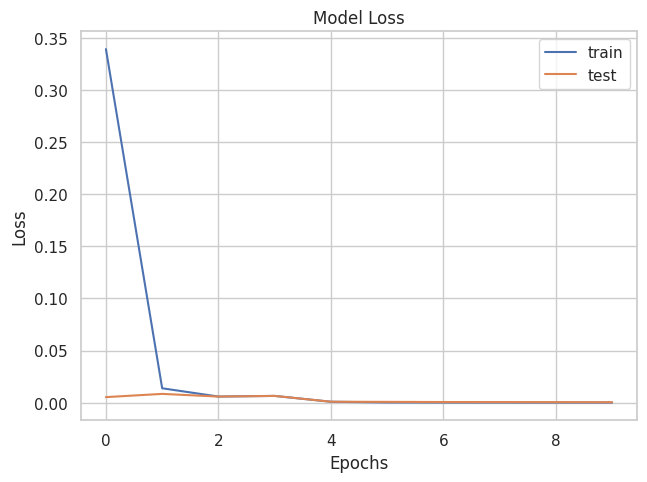

In [45]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

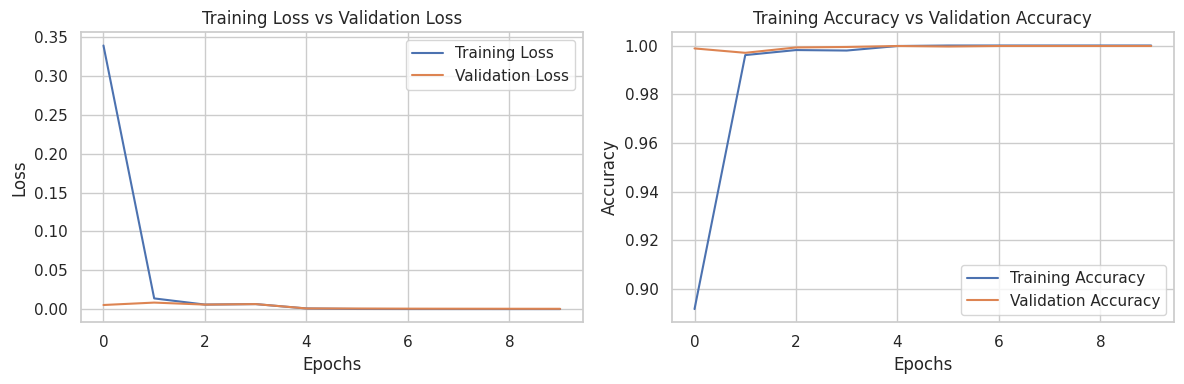

In [46]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(History.history['loss'], label='Training Loss')
plt.plot(History.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(History.history['accuracy'], label='Training Accuracy')
plt.plot(History.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 111ms/step


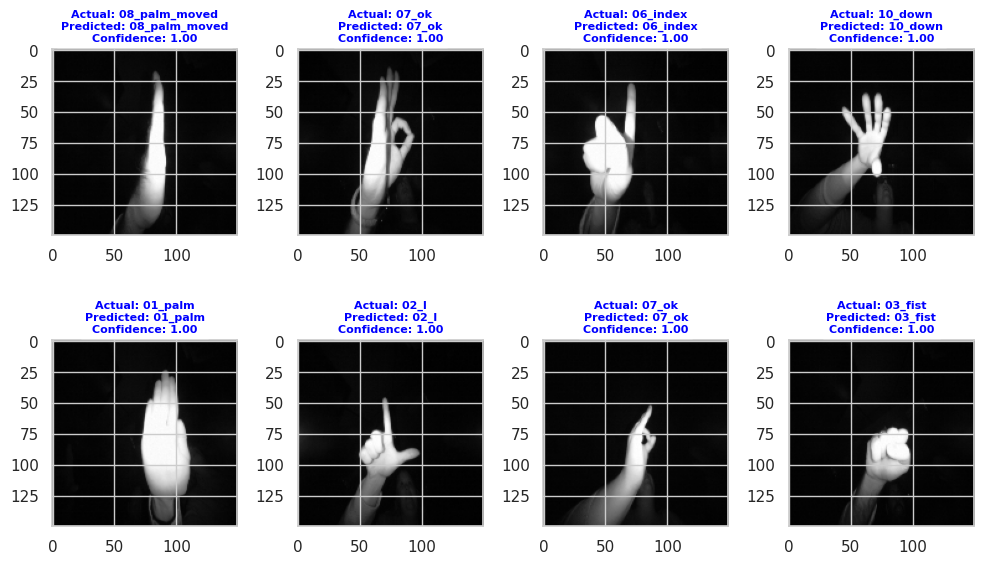

In [50]:
def reverse_lookup(index):
    return reverselookup[index]
num_samples_to_visualize = 8
random_indices = random.sample(range(len(x_test)), num_samples_to_visualize)
x_random_samples = x_test[random_indices]
y_random_labels = y_test[random_indices]
predictions_random = model.predict(x_random_samples)
num_rows = 2
num_cols = num_samples_to_visualize // num_rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))

for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j

        axes[i, j].imshow(x_random_samples[index].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')

        predicted_class = np.argmax(predictions_random[index])
        actual_class = np.argmax(y_random_labels[index])
        confidence = predictions_random[index][predicted_class]

        title_color = 'blue' if predicted_class == actual_class else 'red'
        axes[i, j].set_title(f'Actual: {reverse_lookup(actual_class)}\nPredicted: {reverse_lookup(predicted_class)}\nConfidence: {confidence:.2f}', color=title_color, backgroundcolor='white', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

